# Dependencies and files

## Install dependencies

## Imports

In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

sc.settings.set_figure_params(dpi=80)
#sc.set_figure_params(facecolor="white", figsize=(8, 8))
warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.verbosity = 3

# Global variables

In [2]:
de_dir_path = '../results/DE/mammals/ANOVA_zscore/'

In [3]:
layers = ['L1', 'L2', 'L3', 'L4', 'L5', "L6", 'WM']

In [4]:
os.listdir(de_dir_path)

['anova_zscore_human_sig_genes.csv',
 'anova_zscore_mamm.csv',
 'cluster_spectr_anova_6.csv',
 'cluster_spectr_anova_7.csv',
 'cluster_spectr_anova_8.csv',
 'cluster_spectr_anova_9.csv',
 'cluster_spectr_hs_6.csv',
 'cluster_spectr_hs_7.csv',
 'cluster_spectr_hs_8.csv',
 'cluster_spectr_hs_9.csv',
 'desktop.ini',
 'human_specific_genes_6.csv',
 'ssGSEA_human_sig_genes.csv',
 'ttest_human_sig_genes.csv',
 'ttest_sign_genes.csv',
 'ttest_zscore_human_monkeys.csv',
 'ttest_zscore_mamm.csv']

### DE results

In [5]:
anova_res = pd.read_csv(de_dir_path + 'anova_zscore_mamm.csv', index_col=0)
anova_genes = anova_res[anova_res.p_val_adj < 0.05].index
anova_res.head()

sum_sq    df         F    PR(>F)  p_val_adj
NOC2L     6.384890  12.0  0.813337  0.635908   0.716158
HES4     15.058197  12.0  1.878258  0.052758   0.121203
AGRN     15.583493  12.0  3.171660  0.001230   0.007732
SDF4     14.214074  12.0  1.574430  0.120231   0.220228
B3GALT6  12.113356  12.0  1.676662  0.091658   0.181660

In [6]:
ttest_res = pd.read_csv(de_dir_path + 'ttest_zscore_mamm.csv', index_col=0)
ttest_res.head()

gene layer group1 group2     score    pvalue  p_val_adj
0     AGRN    L1  human  chimp  0.334627  0.749294   0.871771
1  ANKRD65    L1  human  chimp -0.558470  0.596733   0.772328
2  TMEM240    L1  human  chimp  2.100247  0.080450   0.274743
3     NADK    L1  human  chimp -5.641027  0.001330   0.038326
4     GNB1    L1  human  chimp  0.164405  0.874811   0.941712

In [7]:
n_clusters = 7
anova_labels = pd.read_csv(de_dir_path + f'cluster_spectr_anova_{n_clusters}.csv', index_col=0)['0'].sort_values()
anova_labels = anova_labels + 1
anova_labels.name = 'ANOVA_labels'

In [8]:
hum_spec_onehot = pd.read_csv('results/hum_spec_onehot.csv', index_col=0)
hum_spec_onehot

NOC2L  HES4  AGRN  SDF4  B3GALT6  SCNN1D  ACAP3  PUSL1  DVL1  AURKAIP1  \
L1      0     0     0     0        0       1      1      1     0         0   
L2      1     0     0     0        0       1      0      0     0         0   
L3      0     0     0     0        0       0      0      0     0         1   
L4      0     0     0     0        0       0      0      1     0         1   
L5      0     1     1     1        0       0      0      0     1         0   
L6      1     0     0     0        0       1      0      0     0         0   
WM      0     0     0     0        1       0      0      0     0         0   

    ...  FAM207A  ADARB1  POFUT2  COL18A1  SLC19A1  COL6A2  YBEY  PCNT  S100B  \
L1  ...        0       1       0        0        0       0     1     0      0   
L2  ...        0       0       0        1        1       0     1     0      0   
L3  ...        1       0       1        1        0       1     0     1      0   
L4  ...        0       0       1        1        1       1     0     0      1   
L5  ...        1       0       0        0        0       0     0     0      0   
L6  ...        0       1       0        1        0       0     0     0      0   
WM  ...        0       0       0        0        0       0     0     0      0   

    PRMT2  
L1      0  
L2      0  
L3      0  
L4      1  
L5      0  
L6      0  
WM      0  

[7 rows x 6346 columns]

## Load normalized pseudobulks

In [9]:
pb_dir_path = '../data/pseudobulks/'

In [10]:
os.listdir(pb_dir_path)

['annotation_chimp.csv',
 'annotation_human.csv',
 'annotation_macaque.csv',
 'annotation_spatial_libd_human.csv',
 'expression_chimp.csv',
 'expression_human.csv',
 'expression_macaque.csv',
 'expression_mean_chimp.csv',
 'expression_mean_human.csv',
 'expression_mean_macaque.csv',
 'expression_mean_spatial_libd_human.csv',
 'expression_spatial_libd_human.csv',
 'expression_sum_chimp.csv',
 'expression_sum_human.csv',
 'expression_sum_macaque.csv',
 'expression_sum_spatial_libd_human.csv',
 'gene_sample_mean_chimp.csv',
 'gene_sample_mean_human.csv',
 'gene_sample_mean_macaque.csv',
 'gene_sample_mean_spatial_libd_human.csv',
 'pb_age.h5ad',
 'pb_age_sample_norm.h5ad',
 'pb_age_sample_norm_zscore.h5ad',
 'pb_mamm.h5ad',
 'pb_mamm_filtered.h5ad',
 'pb_mamm_laminar_filtered.h5ad',
 'pb_mamm_laminar_sample_zscore_filtered.h5ad',
 'pb_mamm_sample_norm.h5ad',
 'pb_mamm_sample_norm_filtered.h5ad',
 'pb_mamm_sample_norm_zscore.h5ad',
 'pb_mamm_sample_zscore_filtered.h5ad']

In [11]:
adata_pb_norm = sc.read_h5ad(pb_dir_path + 'pb_mamm_sample_zscore_filtered.h5ad')
adata_pb_norm.var = anova_res
adata_pb_norm

AnnData object with n_obs × n_vars = 89 × 9208
    obs: 'layer', 'sample_id', 'condition', 'lib_size', 'log_lib_size'
    var: 'sum_sq', 'df', 'F', 'PR(>F)', 'p_val_adj'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

# Calculate differencies

In [12]:
adata_pb_norm[(adata_pb_norm.obs.condition == 'human') & (adata_pb_norm.obs.layer == 'L1')].obs

layer  sample_id condition     lib_size  log_lib_size
L1.human_759    L1  human_759     human  1922.905518      7.561593
L1.human_j12    L1  human_j12     human  2501.380371      7.824598
L1.human_j3     L1   human_j3     human  3437.235840      8.142423
L1.human_j4     L1   human_j4     human  3236.211426      8.082159
L1.human_j6     L1   human_j6     human  1907.776001      7.553693

In [13]:
# calculate average expr for each layer of each specie
mean_norm_expr_dict = dict()
for specie in ['human', 'chimp', 'macaque']:
    mean_norm_expr = pd.DataFrame(index=adata_pb_norm.var_names, columns=layers)
    for layer in layers:
        mean_norm_expr[layer] = np.array(adata_pb_norm[(adata_pb_norm.obs.condition == specie) &
                                                       (adata_pb_norm.obs.layer == layer)].X.mean(axis=0))
    mean_norm_expr_dict[specie] = mean_norm_expr

In [14]:
# calculate diff
human_chimp_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['chimp']
human_macaque_diff = mean_norm_expr_dict['human'] - mean_norm_expr_dict['macaque']
chimp_macaque_diff = mean_norm_expr_dict['chimp'] - mean_norm_expr_dict['macaque']

Text(0.5, 1.0, 'chimp vs macaque diff')

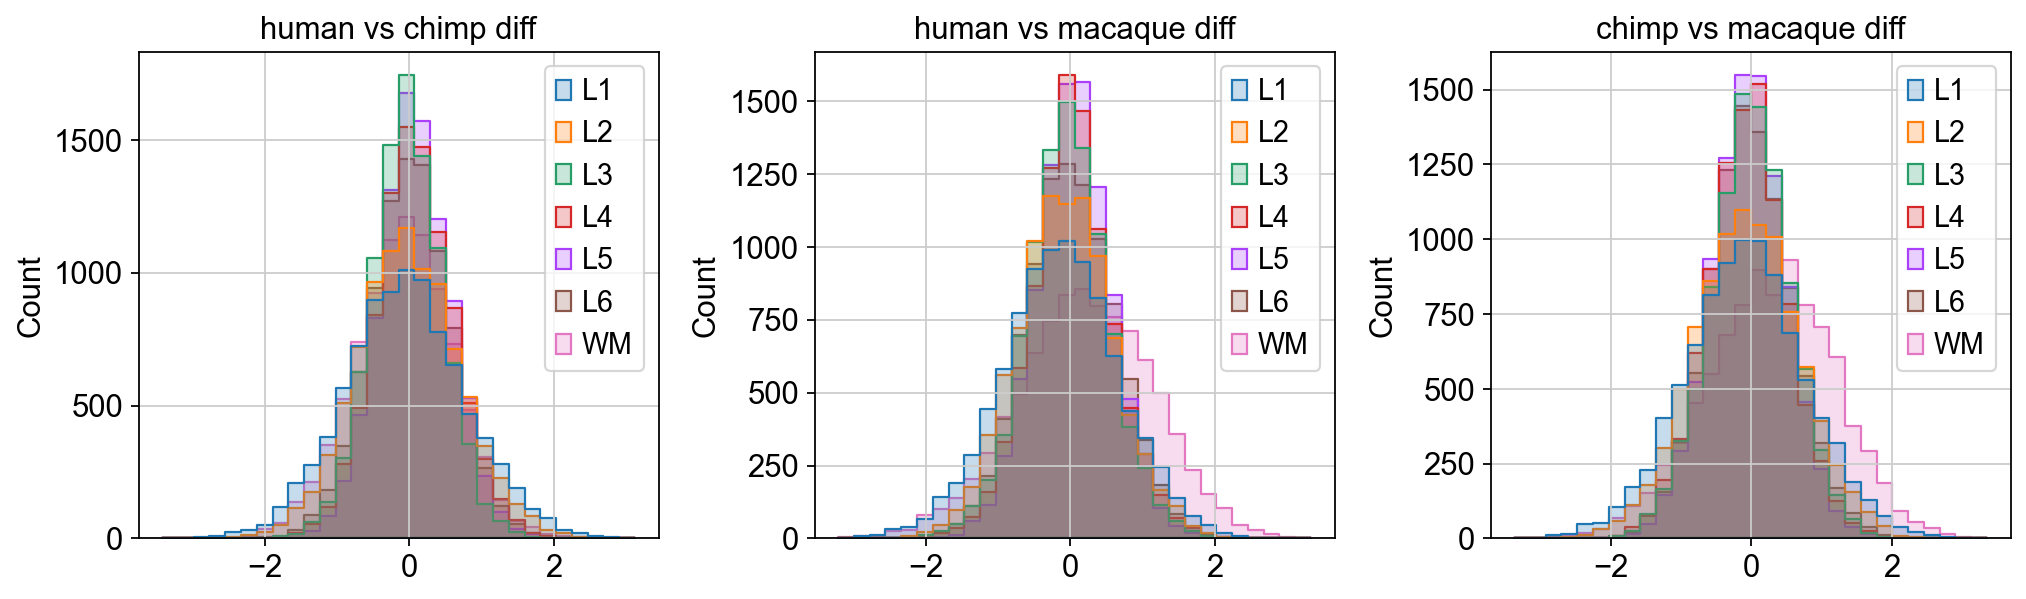

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'wspace': 0.3})

sns.histplot(human_chimp_diff, bins=30, element="step", ax=ax[0])
ax[0].set_title('human vs chimp diff')

sns.histplot(human_macaque_diff, bins=30, element="step", ax=ax[1])
ax[1].set_title('human vs macaque diff')

sns.histplot(chimp_macaque_diff, bins=30, element="step", ax=ax[2])
ax[2].set_title('chimp vs macaque diff')

# Human-specific genes for each layer

## Calculate the ratio

Load human vs chimp and human vs macaque differecies to one dataframe

In [16]:
hum_stack = human_chimp_diff.stack().to_frame().swaplevel(1, 0)
hum_stack.columns = ['human_chimp_diff']
hum_stack['human_macaque_diff'] = human_macaque_diff.stack().swaplevel(1, 0)
hum_stack['ΔHC/ΔHM'] = hum_stack['human_chimp_diff'] / hum_stack['human_macaque_diff']
hum_stack.head()

human_chimp_diff  human_macaque_diff   ΔHC/ΔHM
L1 NOC2L          0.053880            0.164449  0.327639
L2 NOC2L         -0.359535           -0.688927  0.521877
L3 NOC2L          0.052210           -0.244715 -0.213349
L4 NOC2L         -0.199553           -0.042363  4.710539
L5 NOC2L          0.756613           -0.218019 -3.470391

Add t-test results for ANOVA significant genes

In [17]:
hum_stack['hc_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'chimp')].set_index(['layer', 'gene']).p_val_adj
hum_stack['hm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'human') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack['cm_p_val_adj'] = ttest_res[(ttest_res.group1 == 'chimp') & (ttest_res.group2 == 'macaque')].set_index(['layer', 'gene']).p_val_adj
hum_stack.head()

#hum_stack['mult_diff'] = hum_stack['human_chimp_diff'] * hum_stack['human_macaque_diff']
#hum_spec_stack = hum_stack[hum_stack.mult_diff > 0].sort_index()
#hum_spec_stack.head()

human_chimp_diff  human_macaque_diff   ΔHC/ΔHM  hc_p_val_adj  \
L1 NOC2L          0.053880            0.164449  0.327639           NaN   
L2 NOC2L         -0.359535           -0.688927  0.521877           NaN   
L3 NOC2L          0.052210           -0.244715 -0.213349           NaN   
L4 NOC2L         -0.199553           -0.042363  4.710539           NaN   
L5 NOC2L          0.756613           -0.218019 -3.470391           NaN   

          hm_p_val_adj  cm_p_val_adj  
L1 NOC2L           NaN           NaN  
L2 NOC2L           NaN           NaN  
L3 NOC2L           NaN           NaN  
L4 NOC2L           NaN           NaN  
L5 NOC2L           NaN           NaN

Text(0, 0.5, 'Number of genes')

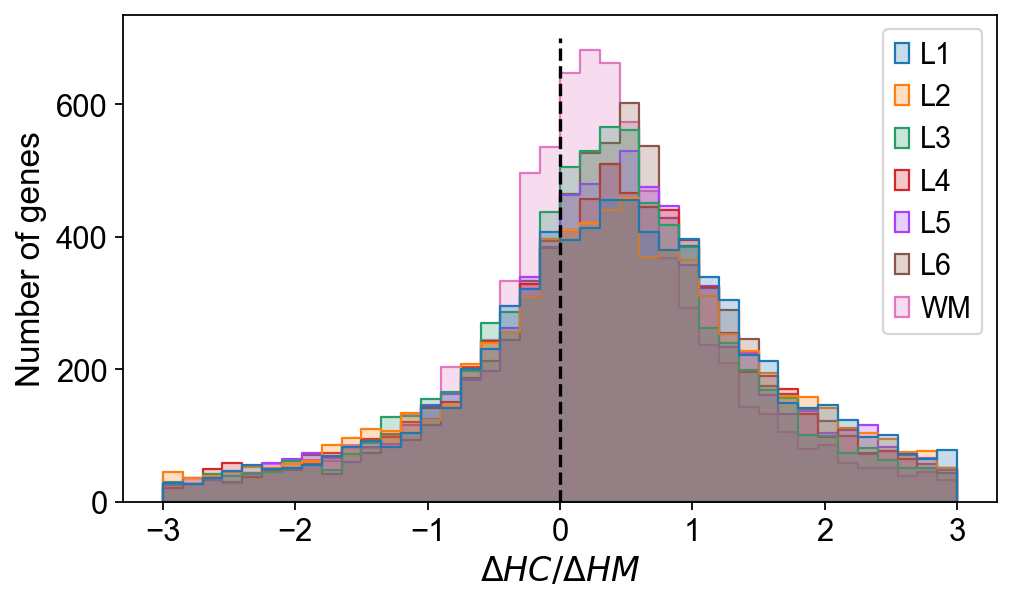

In [18]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(hum_stack['ΔHC/ΔHM'].unstack().T, element="step", binrange=[-3, 3], bins=40)
plt.vlines(0, ymin=0, ymax=700, colors='black', linestyles='dashed')
ax.grid(False)
ax.set_xlabel('$\Delta HC / \Delta HM$', fontsize=15)
ax.set_ylabel('Number of genes', fontsize=15)

In [19]:
hum_stack['human_chimp_diff'] / hum_stack['human_macaque_diff']

L1  NOC2L    0.327639
L2  NOC2L    0.521877
L3  NOC2L   -0.213349
L4  NOC2L    4.710539
L5  NOC2L   -3.470391
               ...   
L3  PRMT2    3.651967
L4  PRMT2    0.552891
L5  PRMT2   -0.240587
L6  PRMT2   -6.419831
WM  PRMT2   -2.026023
Length: 64456, dtype: float64

In [21]:
(hum_stack['ΔHC/ΔHM'] > 0).value_counts()

ΔHC/ΔHM
True     41469
False    22987
Name: count, dtype: int64

# Select for whole profile

## Filter human-specific profiles

In [22]:
#human_chimp_diff, human_macaque_diff, chimp_macaque_diff

In [23]:
hc_l1 = human_chimp_diff.abs().sum(axis=1)
hm_l1 = human_macaque_diff.abs().sum(axis=1)
cm_l1 = chimp_macaque_diff.abs().sum(axis=1)

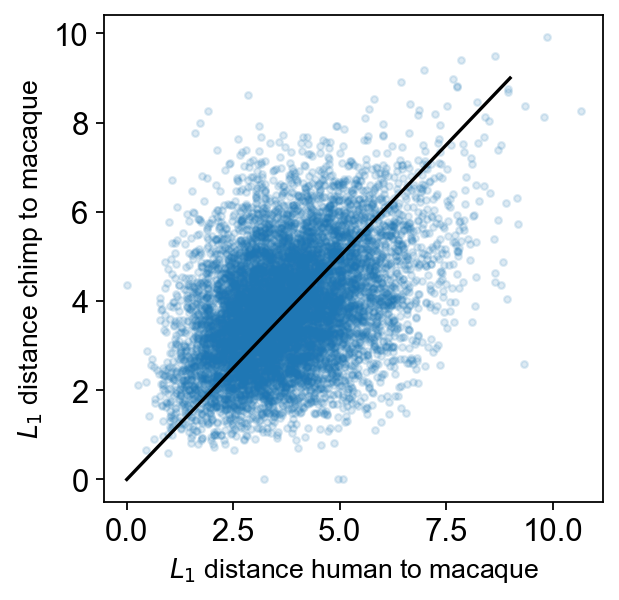

In [24]:
plt.plot(hm_l1, cm_l1, '.', alpha=0.15)
plt.plot([0, 9], [0, 9], 'black')
plt.xlabel('$L_1$ distance human to macaque', fontsize=12)
plt.ylabel('$L_1$ distance chimp to macaque', fontsize=12)
plt.grid(False)

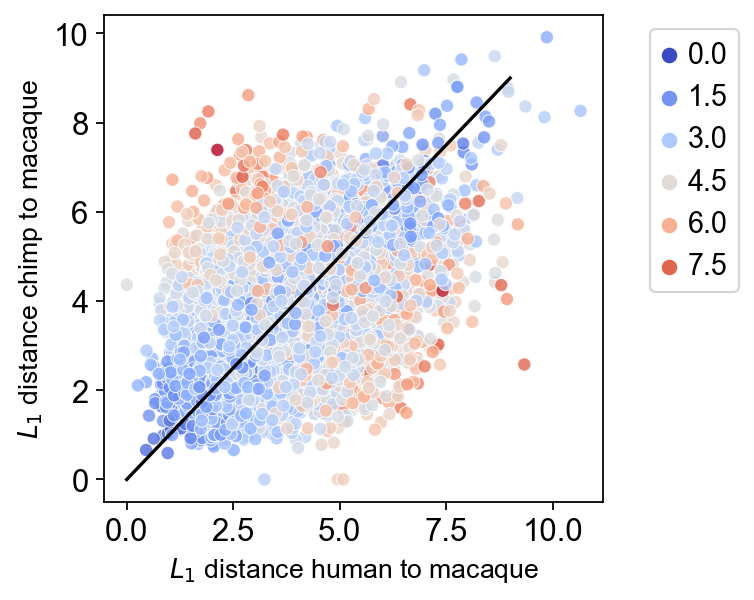

In [25]:
sns.scatterplot(x=hm_l1, y=cm_l1, hue=hc_l1, alpha=0.8, palette='coolwarm')
plt.plot([0, 9], [0, 9], 'black')
plt.xlabel('$L_1$ distance human to macaque', fontsize=12)
plt.ylabel('$L_1$ distance chimp to macaque', fontsize=12)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(False)

Text(0.5, 0, '$L_1(HM) - L1(CM)$ ')

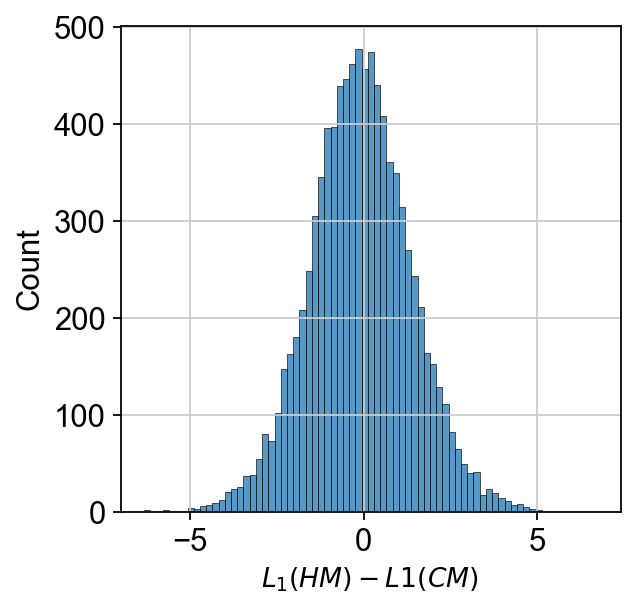

In [28]:
sns.histplot(hm_l1 - cm_l1)
plt.xlabel('$L_1(HM) - L1(CM)$ ', fontsize=12)

Filter genes:
$$
L_1(HM) > L_1(CM)
$$

In [29]:
gene_filter1 = (hm_l1 > cm_l1)

In [30]:
gene_filter2 = (hm_l1 > hc_l1)

Filter genes:
$$
0.5 \le \frac{L_1(HC)}{L_1(HM)} \le 1
$$

In [32]:
#gene_filter2 = ((hc_l1 / hm_l1 >= 0.5) & (hc_l1 / hm_l1 <= 1))

Filter genes:
$$
L_1(HC) >= q_{0.9}
$$

In [36]:
quantile = 0.9
quant_value = hc_l1.quantile(quantile)
gene_filter3 = (hc_l1 >= quant_value)
gene_filter3.sum()

921

Text(0.5, 1.0, '$L_1$ distance human vs chimp')

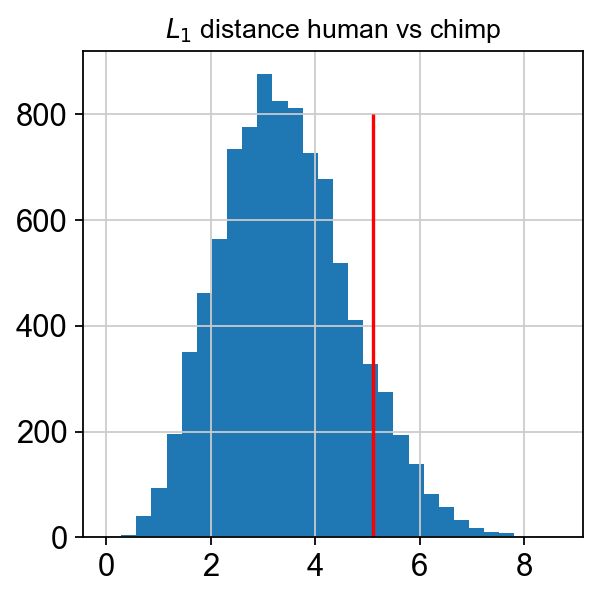

In [37]:
plt.vlines(quant_value, ymin=0, ymax=800,colors='red')
hc_l1.hist(bins=30)
plt.title('$L_1$ distance human vs chimp', fontsize=12)

Apply all filters to find genes with human-specific profiles

In [39]:
#hs_genes = hc_l1[(gene_filter1) & (gene_filter2 | gene_filter3)].index
hs_genes = hc_l1[(gene_filter1) & (gene_filter2) & (gene_filter3)].index
hs_genes

Index(['NADK', 'PLEKHG5', 'SESN2', 'PPCS', 'SH3GLB1', 'OLFM3', 'HENMT1',
       'INKA2', 'PIP5K1A', 'ABL2',
       ...
       'CBLN4', 'RAB22A', 'ATP5F1E', 'CFD', 'UNC13A', 'ETHE1', 'ETFB', 'SFI1',
       'TSPO', 'NDUFV3'],
      dtype='object', length=142)

In [40]:
hs_layers_prof_inter = hum_spec_onehot.columns.intersection(hs_genes)
hs_layers_prof_inter

Index(['NADK', 'PLEKHG5', 'PPCS', 'SH3GLB1', 'OLFM3', 'HENMT1', 'INKA2',
       'PIP5K1A', 'ABL2', 'SMG7',
       ...
       'KCNG1', 'CBLN4', 'RAB22A', 'CFD', 'UNC13A', 'ETHE1', 'ETFB', 'SFI1',
       'TSPO', 'NDUFV3'],
      dtype='object', length=132)

Text(0.5, 1.0, 'Number of human-specific genes for each layer')

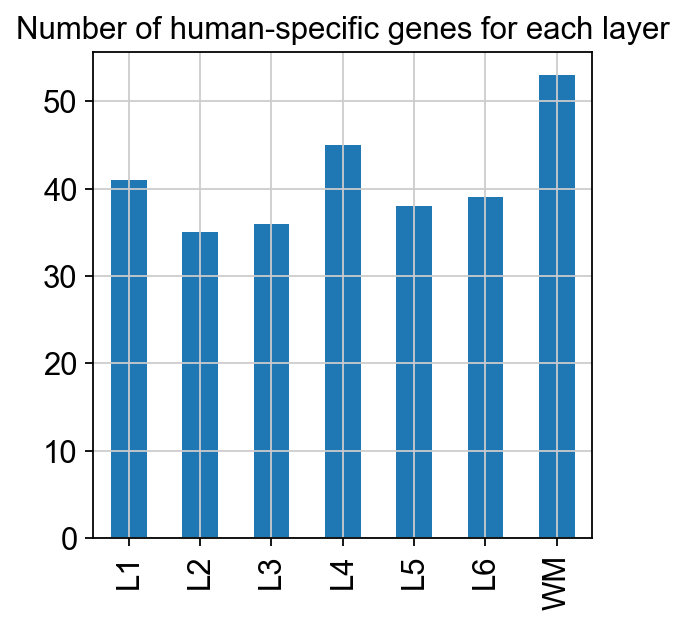

In [41]:
hs_inter_onehot = hum_spec_onehot[hs_layers_prof_inter]
hs_inter_onehot.sum(axis=1).plot.bar()
plt.title('Number of human-specific genes for each layer')

In [42]:
from itertools import combinations
count_df = pd.DataFrame(columns=hs_inter_onehot.index, index=hs_inter_onehot.index)
for lay1, lay2 in combinations(layers, 2):
    count_num = (hs_inter_onehot.loc[lay1] * hs_inter_onehot.loc[lay2]).sum()
    count_df.loc[[lay1, lay2], [lay1, lay2]] = count_num
    count_df.loc[lay1, lay1] = hs_inter_onehot.loc[lay1].sum()
    count_df.loc[lay2, lay2] = hs_inter_onehot.loc[lay2].sum()
count_df = count_df.astype(int)
count_df

L1  L2  L3  L4  L5  L6  WM
L1  41   7   8  11  11   8  11
L2   7  35  10  15   7  10  14
L3   8  10  36  12   6  10  14
L4  11  15  12  45  10  13  17
L5  11   7   6  10  38  16  13
L6   8  10  10  13  16  39  11
WM  11  14  14  17  13  11  53

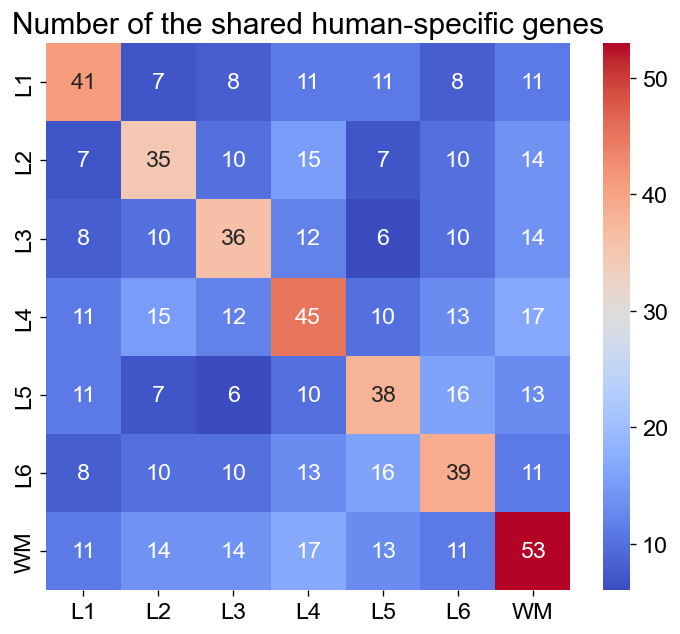

In [43]:
plt.figure(figsize=(7, 6), dpi=60)
sns.heatmap(count_df, annot=True, cmap = 'coolwarm', fmt=".0f")
plt.title('Number of the shared human-specific genes', fontsize=18)
plt.grid(False)

## Intersection with ANOVA genes

In [44]:
df = pd.DataFrame(adata_pb_norm.X, index=adata_pb_norm.obs_names, columns=adata_pb_norm.var_names)
df.head()

NOC2L      HES4      AGRN      SDF4   B3GALT6    UBE2J2  \
WM.human_759 -0.650878  0.001029 -0.587605 -0.980993  0.472367  1.702099   
L5.human_759  0.915017 -1.205565  1.094584 -0.735551  1.957271  0.575298   
L2.human_759  0.078276  1.329032 -1.277674  1.001606 -0.366053 -0.971476   
L3.human_759  0.314214  0.062098  0.755363 -0.503540 -0.740480 -0.135018   
L1.human_759 -1.874858  1.294498 -0.816885  1.145918 -0.526890 -1.202880   

                SCNN1D     ACAP3     PUSL1    INTS11  ...   SLC19A1    COL6A2  \
WM.human_759 -0.763371  2.107840 -0.168666  1.413201  ... -0.445986 -0.369059   
L5.human_759 -1.325118 -0.153488  1.188971 -1.648704  ...  0.914502  0.304568   
L2.human_759  1.537086 -0.364400 -0.362555  0.192616  ... -1.848748 -0.827055   
L3.human_759 -0.612045 -0.777390  0.168894  0.687944  ...  0.110767 -0.448743   
L1.human_759 -0.098583 -0.504741 -1.933483  0.422461  ...  1.154257  2.137187   

               SPATC1L       LSS    MCM3AP      YBEY      PCNT     DIP2A  \
WM.human_759  1.371567  0.091970  0.263215 -1.660742  1.229293  2.069564   
L5.human_759  0.680849 -0.169549  0.190831  1.336182  0.303885 -0.040874   
L2.human_759  0.223001 -1.230772 -1.508703  0.411800 -0.635369 -0.781407   
L3.human_759 -1.226639 -0.094421  1.691777 -0.449152 -0.432952 -0.828458   
L1.human_759 -1.033139  1.874758 -0.846384  0.646753  1.406117  0.104341   

                 S100B     PRMT2  
WM.human_759 -0.043002  1.253314  
L5.human_759 -0.537251 -0.525737  
L2.human_759 -0.326476  0.482834  
L3.human_759 -0.521913 -0.859364  
L1.human_759  2.236617  0.875557  

[5 rows x 9208 columns]

In [45]:
sample_order = dict()
for cond in ['human', 'chimp', 'macaque']:
    samples = df.loc[df.index.str.contains(cond)].index
    order = samples.sort_values()
    order_laminar = order[order.str.contains('L')].tolist()
    order_wm = order[order.str.contains('WM')].tolist()
    sample_order[cond] = order_wm + order_laminar
sample_order['all'] = sample_order['human'] + sample_order['chimp'] + sample_order['macaque']
df = df.loc[sample_order['all']]

In [46]:
anova_hs_inter = hs_genes.intersection(anova_labels.index)
anova_hs_inter

Index(['NADK', 'PLEKHG5', 'SESN2', 'PPCS', 'SH3GLB1', 'OLFM3', 'HENMT1',
       'INKA2', 'ABL2', 'SMG7',
       ...
       'CBLN4', 'RAB22A', 'ATP5F1E', 'CFD', 'UNC13A', 'ETHE1', 'ETFB', 'SFI1',
       'TSPO', 'NDUFV3'],
      dtype='object', length=136)

Text(0.5, 1.0, 'Portion of genes with HS profiles')

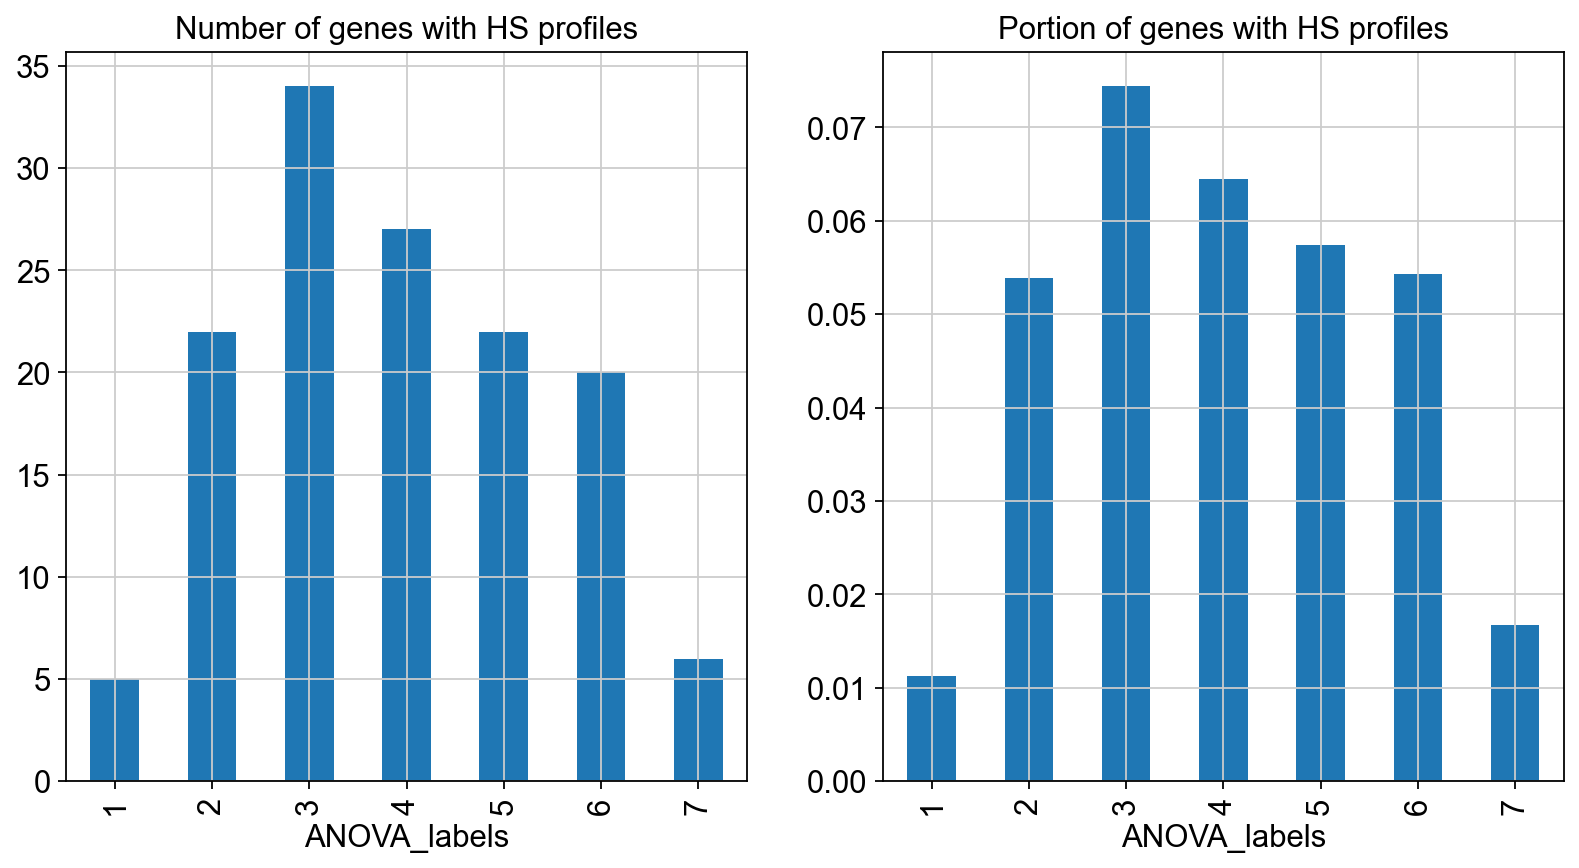

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
anova_counts = anova_labels.loc[anova_hs_inter].value_counts().sort_index()
anova_counts.plot.bar(ax=ax[0])
ax[0].set_title('Number of genes with HS profiles')

anova_freq = anova_counts / anova_labels.value_counts().sort_index()
anova_freq.plot.bar(ax=ax[1])
ax[1].set_title('Portion of genes with HS profiles')

In [48]:
df_annotation = df[anova_hs_inter].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [49]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

NADK   PLEKHG5     SESN2      PPCS   SH3GLB1     OLFM3  \
condition layer                                                               
chimp     L1     1.106832 -0.667490  0.664582  0.906215  0.892008  0.501003   
          L2    -1.020345  0.239202  0.486142 -0.093807  0.976660 -0.217532   
          L3     0.254596 -0.303065  0.049806  0.313166  0.764286 -0.913294   
          L4    -0.128780 -0.188922 -1.030168  0.198840 -0.810203  0.204649   
          L5    -0.061237  0.494671 -0.381313 -0.257897 -0.354755  0.597200   

                   HENMT1     INKA2      ABL2      SMG7  ...     CBLN4  \
condition layer                                          ...             
chimp     L1    -0.030168 -0.525227 -0.686057 -0.936552  ...  1.671409   
          L2     0.997897  0.121817 -0.686057  0.826984  ...  0.733283   
          L3    -0.758953  1.438730  0.213414  0.302915  ...  0.044213   
          L4     0.038347  0.396929 -0.275781  0.192937  ... -0.098922   
          L5    -0.071616 -0.327729  0.105707 -0.196624  ... -0.479306   

                   RAB22A   ATP5F1E       CFD    UNC13A     ETHE1      ETFB  \
condition layer                                                               
chimp     L1     0.564196  0.830572  1.237646 -0.707192  0.147267  1.440007   
          L2    -0.180769 -0.261335 -1.450744 -0.707192 -0.747904 -0.656802   
          L3     0.122295  0.149554 -0.260267  0.635265 -0.919316 -0.445625   
          L4    -0.020093  0.388307 -0.648393 -0.151694 -0.692517  0.247874   
          L5    -0.393990 -0.034936 -0.251534 -0.041294 -0.182602 -0.246881   

                     SFI1      TSPO    NDUFV3  
condition layer                                
chimp     L1     1.278643  0.628076 -0.401580  
          L2    -0.626456 -0.813974  0.416086  
          L3     0.211065 -0.413849 -0.698233  
          L4    -0.775821 -0.695252 -0.449077  
          L5     0.096451 -0.049638  0.150024  

[5 rows x 136 columns]

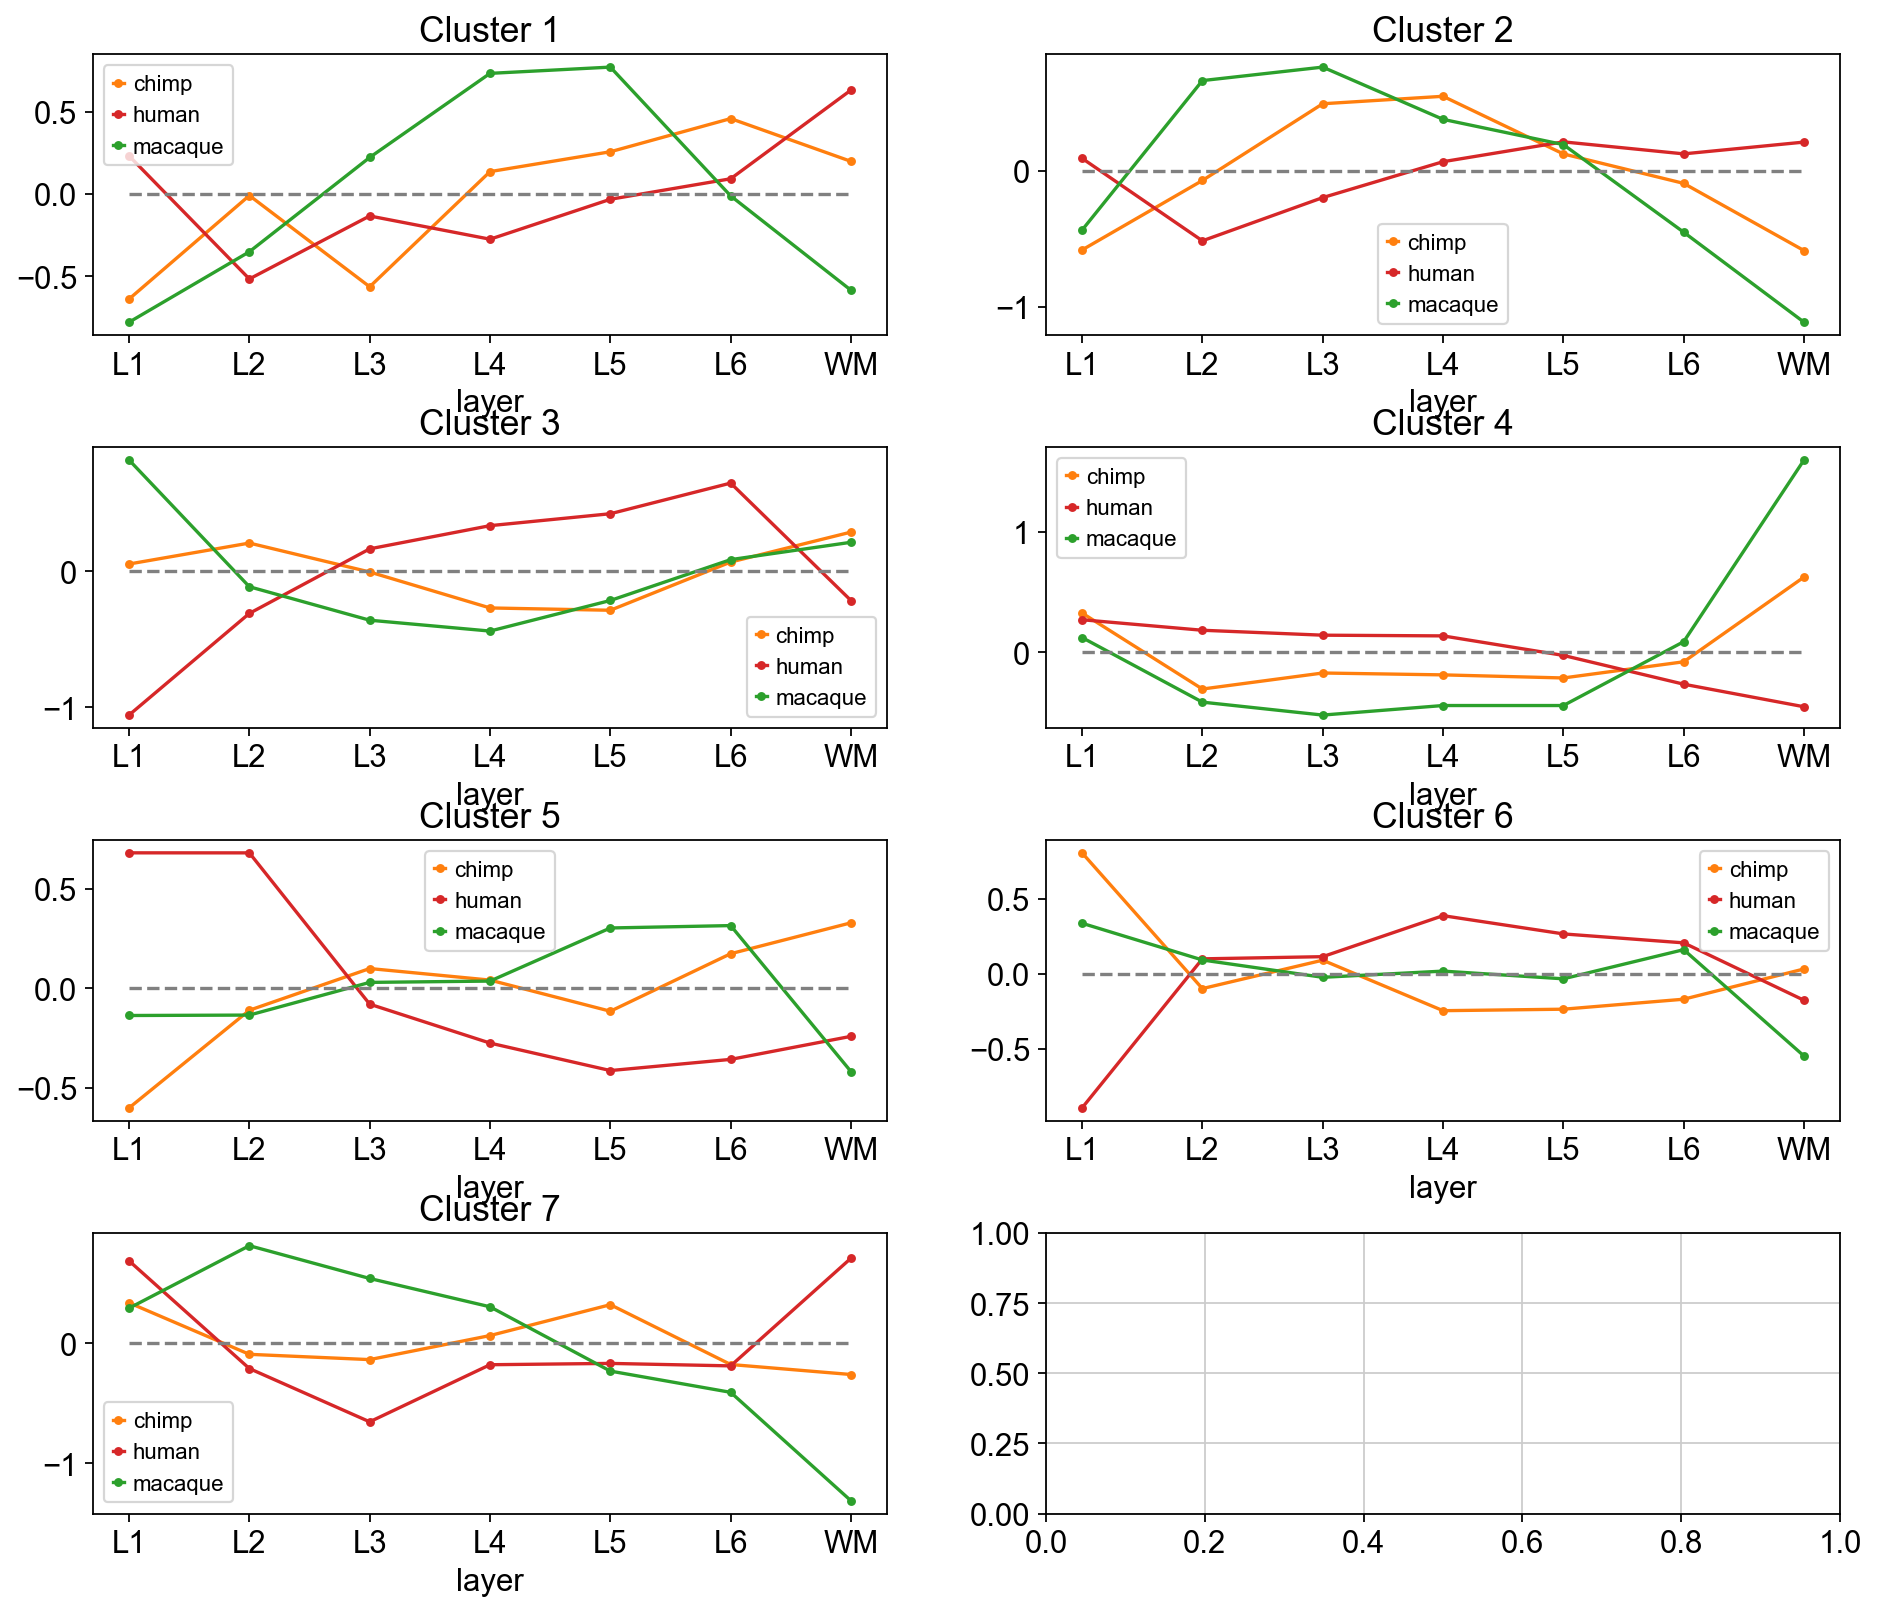

In [50]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})

for label, ax in zip(anova_labels.unique(), axes.flatten()):
    genes = anova_labels.loc[anova_hs_inter]
    genes = genes[genes == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

In [51]:
anova_hs_inter

Index(['NADK', 'PLEKHG5', 'SESN2', 'PPCS', 'SH3GLB1', 'OLFM3', 'HENMT1',
       'INKA2', 'ABL2', 'SMG7',
       ...
       'CBLN4', 'RAB22A', 'ATP5F1E', 'CFD', 'UNC13A', 'ETHE1', 'ETFB', 'SFI1',
       'TSPO', 'NDUFV3'],
      dtype='object', length=136)

In [52]:
hum_spec_anova_onehot = hs_inter_onehot[hs_inter_onehot.columns.intersection(anova_hs_inter)]

In [53]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['ANOVA cluster'] = anova_labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['ANOVA cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer          L1  L2  L3  L4  L5  L6  WM
ANOVA cluster                            
1               2   1   2   1   3   1   2
2               5   6   8   6   4   6  10
3              20   3   7  13  11  10   8
4               4   9  10   7   7   6  15
5               2   7   2   9   6   7   6
6               4   5   5   5   4   6   5
7               2   2   1   1   2   1   4

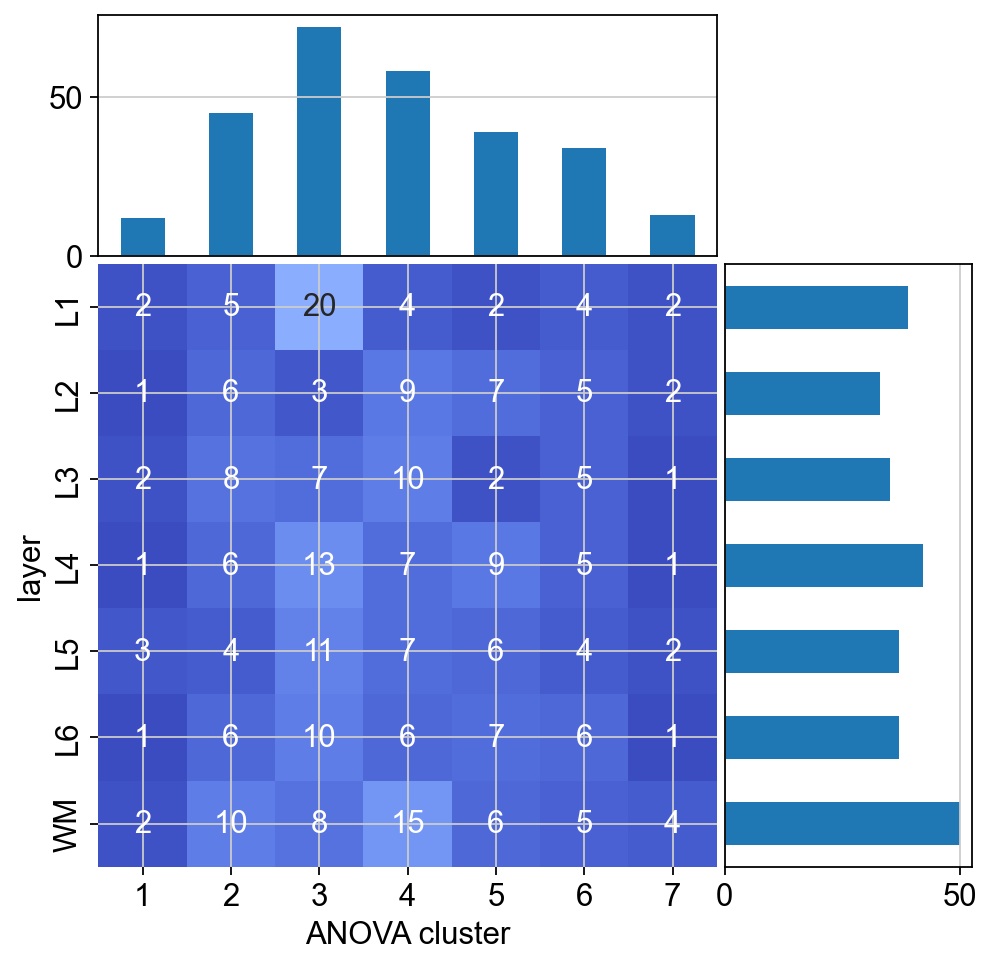

In [55]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

## Cluster genes

### Hierarchical

D:\Projects\diploma\venv_stats2\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


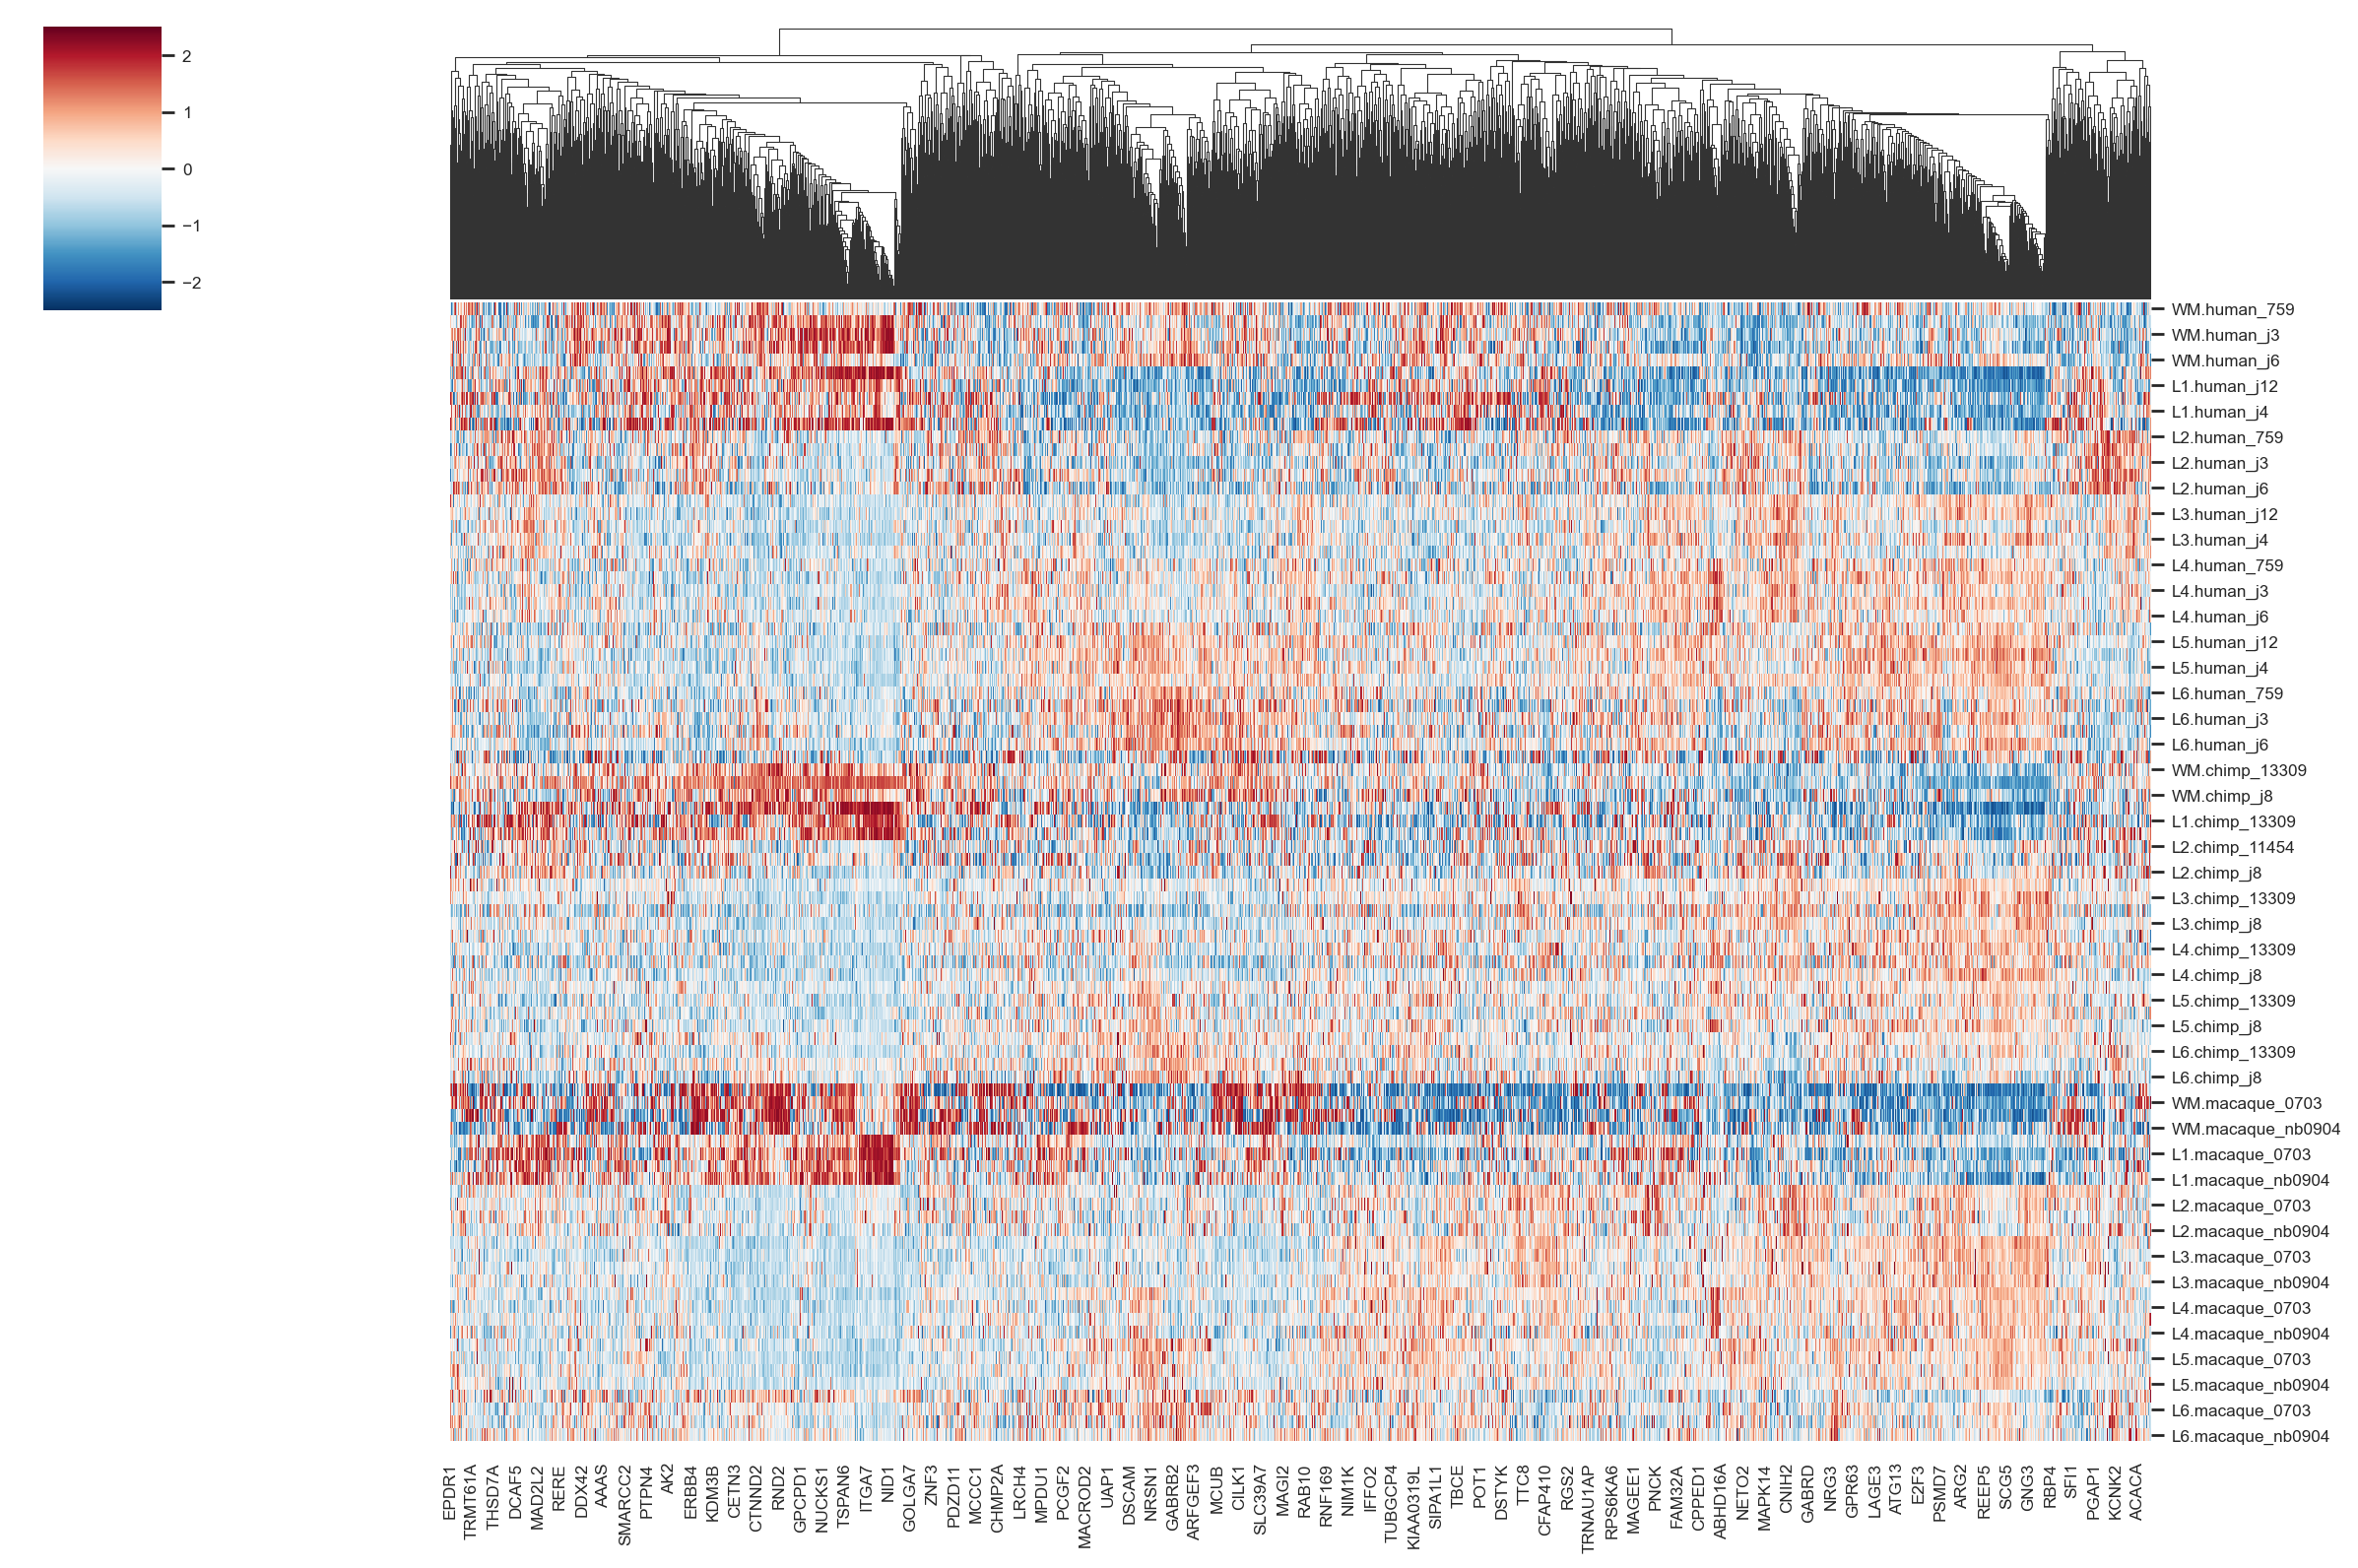

In [38]:
sns.set(font_scale=0.7)
sns.clustermap(df[hs_genes], figsize=(15, 10), cmap="RdBu_r", center=0, vmax=2.5, vmin=-2.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

In [72]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df[hs_genes].T, metric='cosine') + 1
n_clusters = 7
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=7,
                   random_state=4)

In [73]:
labels = pd.Series(clustering.labels_, index=hs_genes).sort_values()
order = labels.sort_values().index

In [76]:
labels.to_csv('results/hs_prof.csv')

In [141]:
labels = pd.read_csv('results/hs_prof.csv', index_col=0)['0']
labels

MRPL13     0
CEP120     0
PDLIM4     0
CIAO1      0
TMEM127    0
          ..
NSD2       6
METRNL     6
WDR45B     6
PUDP       6
MAPK7      6
Name: 0, Length: 2949, dtype: int64

<Axes: >

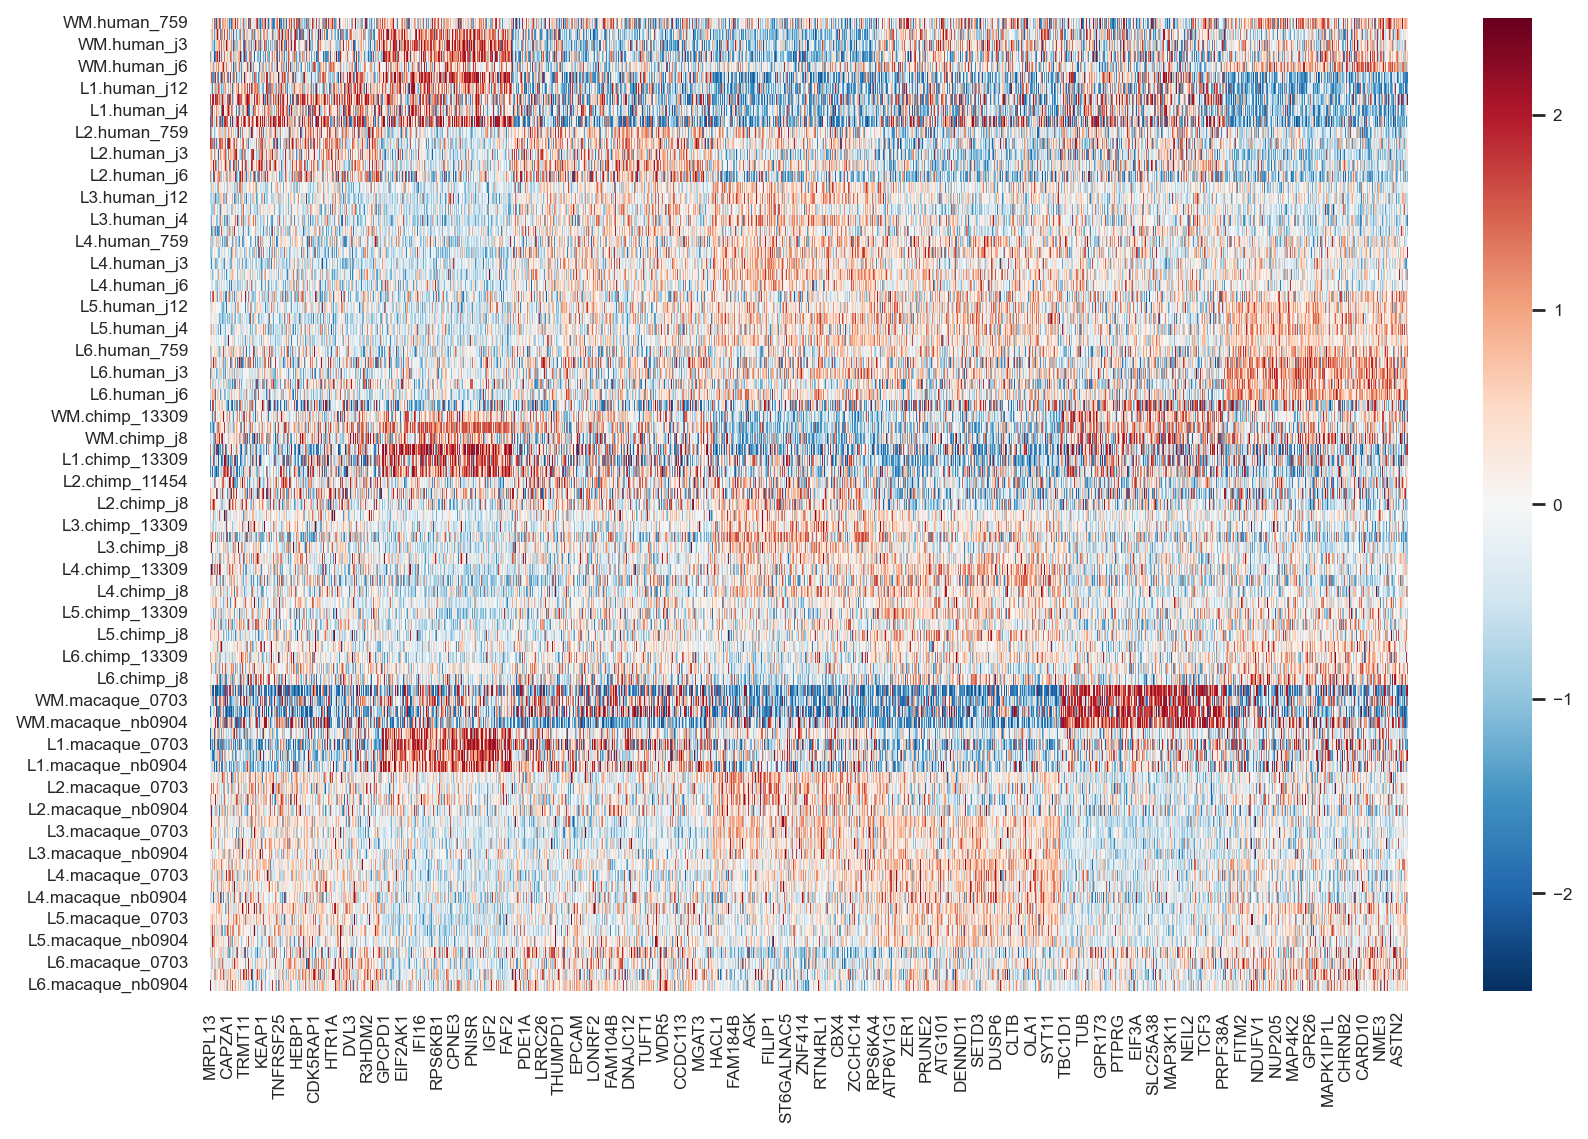

In [75]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.loc[sample_order['all'], order], ax=ax, cmap="RdBu_r", vmax=2.5, vmin=-2.5, center=0)
#plt.savefig(f'heatmaps/heatmap_spectr{n_clusters}_anova.png', bbox_inches='tight')

In [77]:
df_annotation = df[hs_genes].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [78]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

HES4   B3GALT6    UBE2J2     PUSL1    MRPL20   ANKRD65  \
condition layer                                                               
chimp     L1     0.353655 -0.320918  0.371932 -0.338637  0.244849  0.000000   
          L2    -0.244119 -0.320918 -0.955585 -0.280824 -0.354620  0.000000   
          L3     0.045336  0.476792 -0.017932  0.155180 -0.285386 -0.111803   
          L4     0.121193 -0.020897  0.686458 -0.112241 -0.460649 -0.111803   
          L5     0.111245 -0.003522 -0.471423 -0.184447  0.101543 -0.111803   

                     NADK     GABRD    FAAP20    TPRG1L  ...      PCP4  \
condition layer                                          ...             
chimp     L1     1.106832 -0.499093 -0.718225 -0.863436  ... -0.821467   
          L2    -1.020345 -0.836275  0.965990 -0.486980  ... -1.161794   
          L3     0.254596  0.962491  0.051409  0.167389  ... -0.898746   
          L4    -0.128780  0.408388 -0.322941  0.939922  ...  0.751622   
          L5    -0.061237 -0.165721  0.422940  0.943084  ...  1.081032   

                    DSCAM   SLC37A1    NDUFV3     RRP1B      PDXK      PFKL  \
condition layer                                                               
chimp     L1    -1.434593 -0.346031 -0.401580  1.555814  0.366631  0.719720   
          L2    -0.392086  0.550133  0.416086  0.547475  0.063022  0.215785   
          L3    -0.741910  1.403646 -0.698233 -1.020194 -0.579462 -0.170436   
          L4    -0.069347 -0.204636 -0.449077 -0.959363 -0.337268 -0.167374   
          L5     0.657609 -0.043083  0.150024 -0.038893 -0.111654 -0.358772   

                  CFAP410   SLC19A1       LSS  
condition layer                                
chimp     L1     0.028516 -0.663443 -0.125988  
          L2     0.246156 -0.299084 -0.125988  
          L3     0.355550  0.232574  1.005520  
          L4     0.811889 -0.335082 -0.232370  
          L5    -0.130464 -0.449456 -0.232370  

[5 rows x 2949 columns]

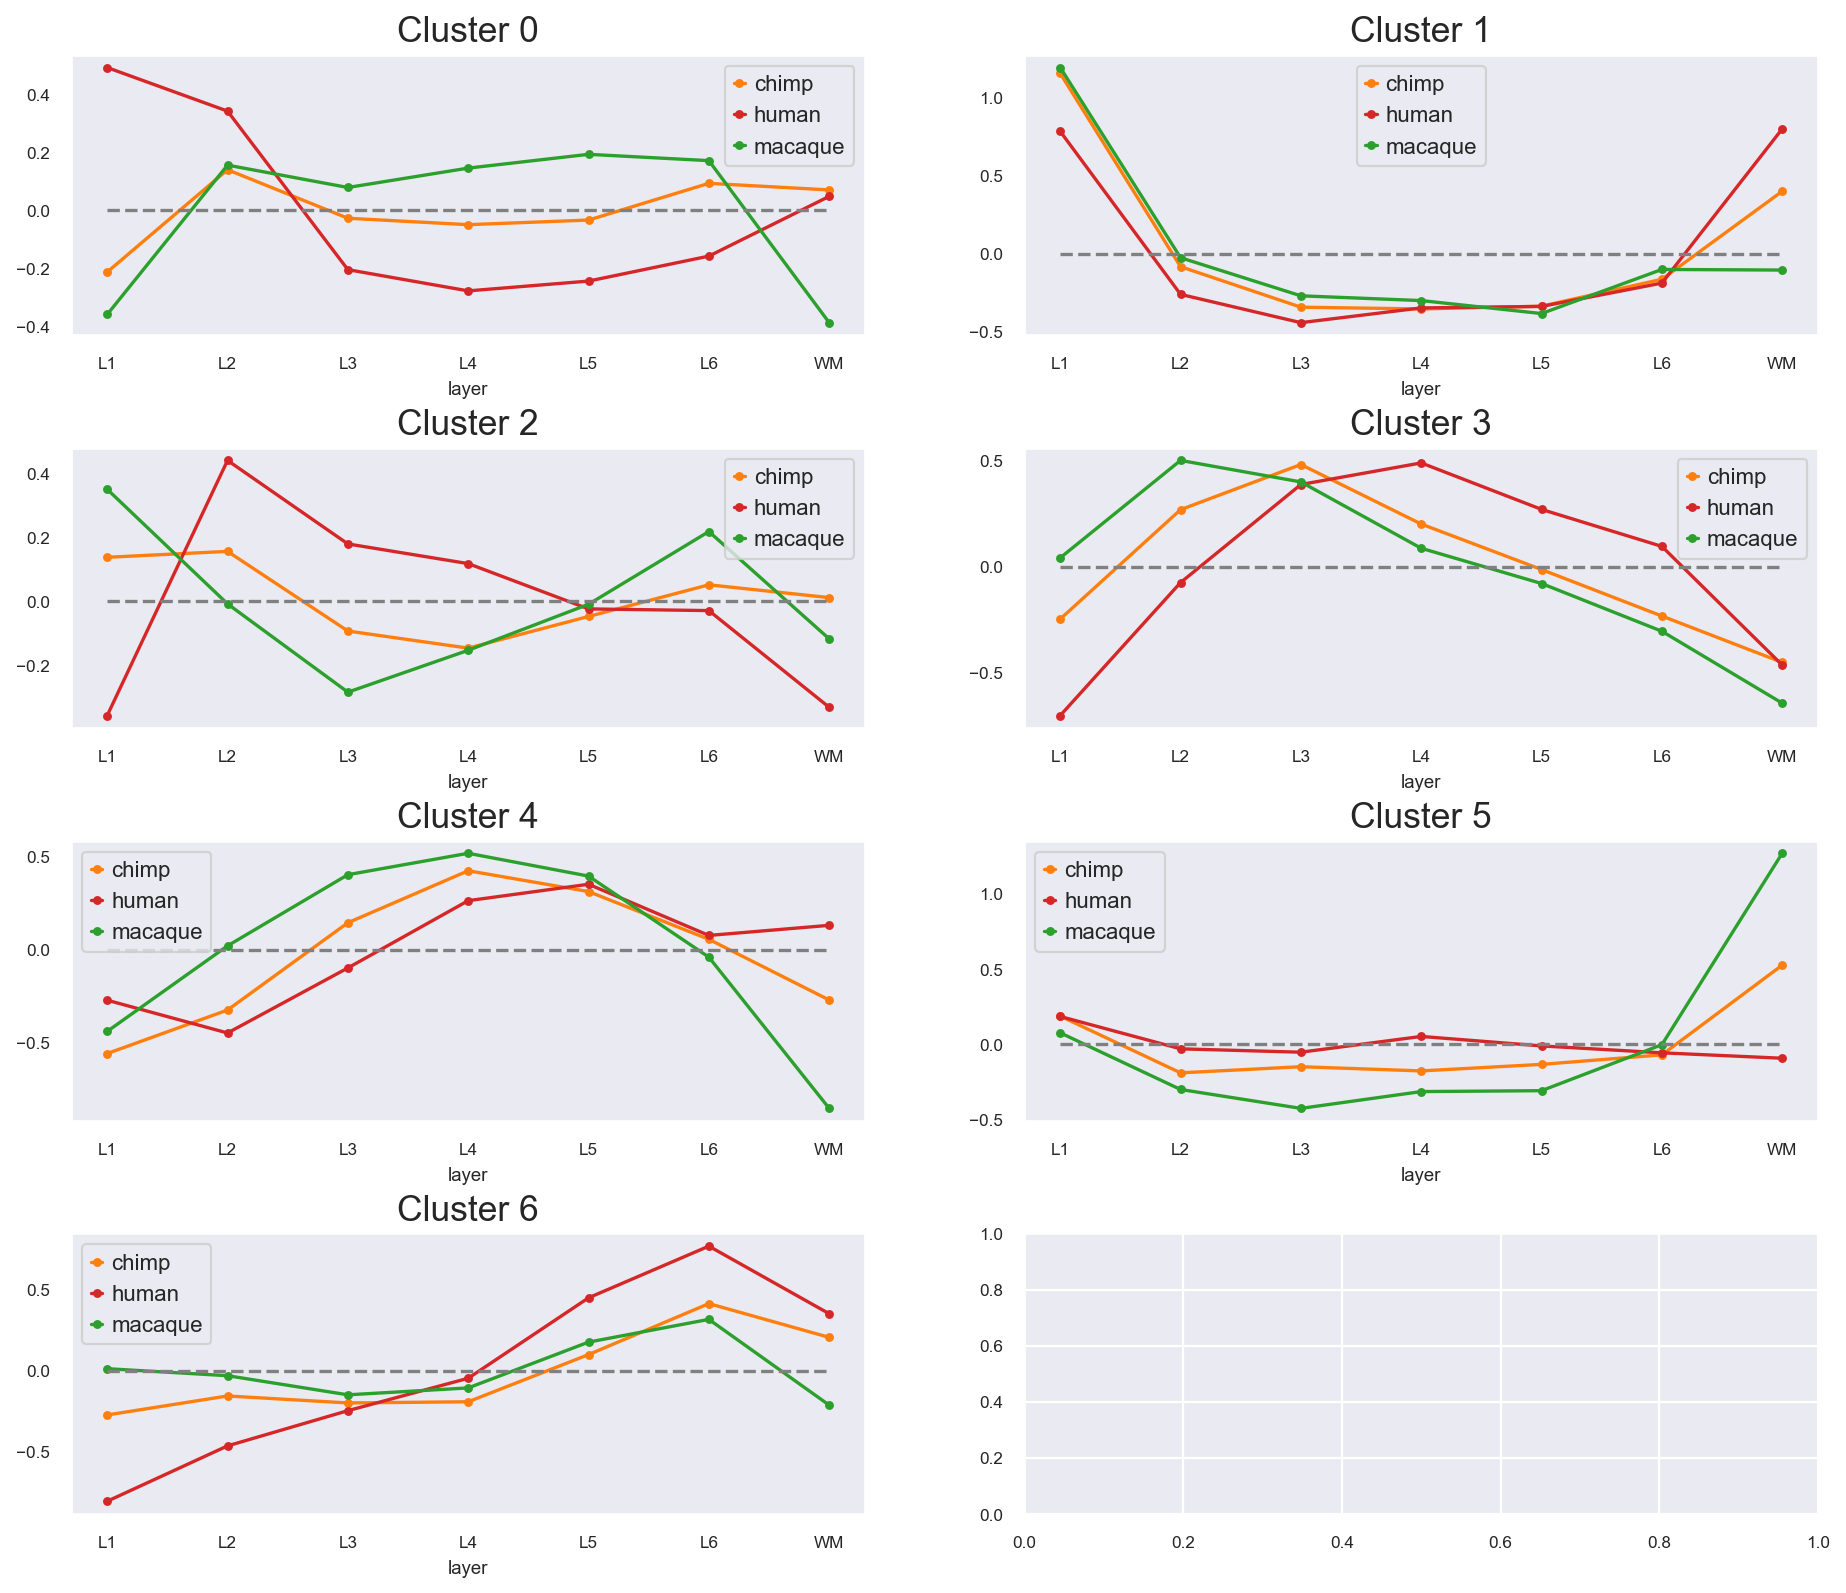

In [79]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

## Intersect with ANOVA clusters

In [95]:
table_to_pivot = pd.concat([anova_labels.loc[anova_hs_inter], labels.loc[anova_hs_inter]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels         0      1     2     3     4      5     6
ANOVA_labels                                             
1              18.0    0.0   3.0   0.0  42.0    1.0  73.0
2              17.0    1.0   0.0  70.0  96.0    1.0   8.0
3               0.0    0.0  68.0  52.0   2.0   15.0  79.0
4               4.0    4.0   8.0   3.0   0.0  129.0   5.0
5             104.0    0.0  39.0   3.0   4.0   11.0   0.0
6               2.0    4.0  36.0  37.0   7.0    9.0  20.0
7               8.0  113.0   4.0   3.0  10.0    0.0   5.0

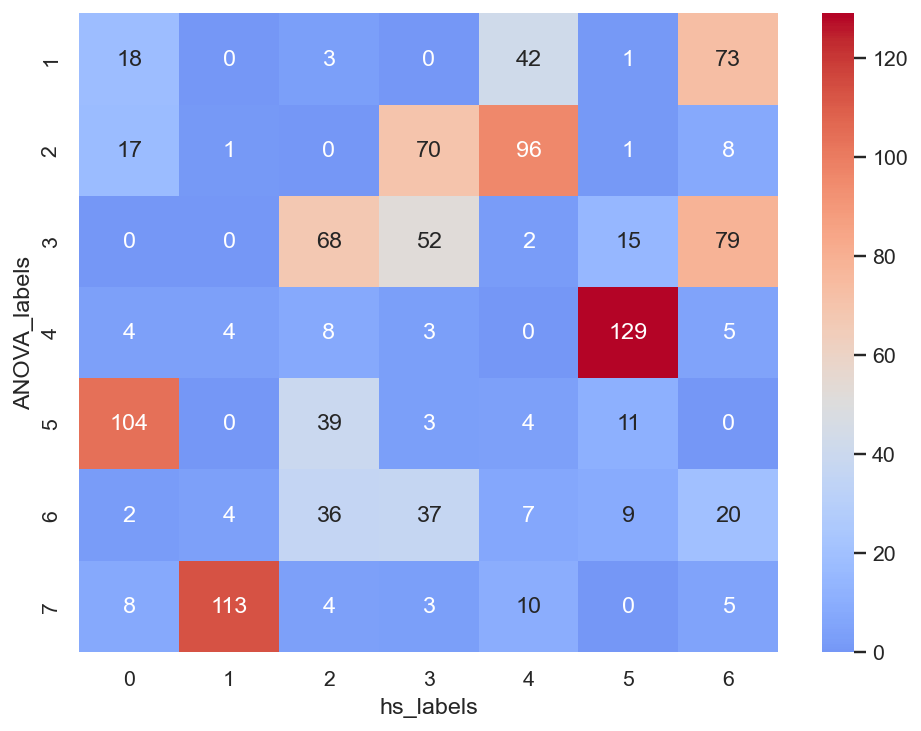

In [96]:
plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f")
plt.grid(False)

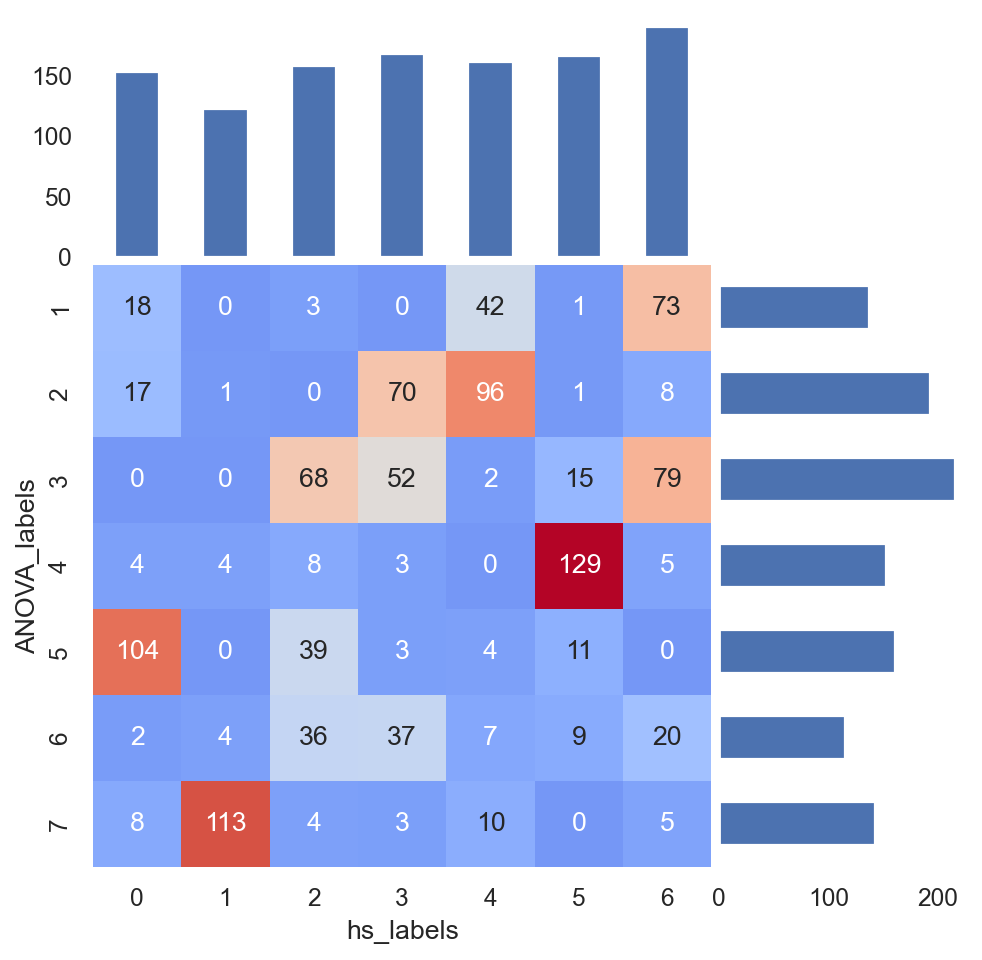

In [105]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

In [97]:
anova_dummies = anova_labels.astype(str).str.get_dummies()
anova_dummies.columns = 'ANOVA_' + anova_dummies.columns
anova_dummies.head()

ANOVA_1  ANOVA_2  ANOVA_3  ANOVA_4  ANOVA_5  ANOVA_6  ANOVA_7
PRMT2         1        0        0        0        0        0        0
CELF4         1        0        0        0        0        0        0
MRPL40        1        0        0        0        0        0        0
CDH2          1        0        0        0        0        0        0
BRINP2        1        0        0        0        0        0        0

In [98]:
hs_dummies = labels.astype(str).str.get_dummies()
hs_dummies.columns = 'hum-spec_' + hs_dummies.columns
hs_dummies.head()

hum-spec_0  hum-spec_1  hum-spec_2  hum-spec_3  hum-spec_4  \
MRPL13            1           0           0           0           0   
CEP120            1           0           0           0           0   
PDLIM4            1           0           0           0           0   
CIAO1             1           0           0           0           0   
TMEM127           1           0           0           0           0   

         hum-spec_5  hum-spec_6  
MRPL13            0           0  
CEP120            0           0  
PDLIM4            0           0  
CIAO1             0           0  
TMEM127           0           0

In [99]:
dummie_concat = pd.concat([anova_dummies, hs_dummies], axis=1).fillna(0)
dummie_concat.head()

ANOVA_1  ANOVA_2  ANOVA_3  ANOVA_4  ANOVA_5  ANOVA_6  ANOVA_7  \
PRMT2       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
CELF4       1.0      0.0      0.0      0.0      0.0      0.0      0.0   
MRPL40      1.0      0.0      0.0      0.0      0.0      0.0      0.0   
CDH2        1.0      0.0      0.0      0.0      0.0      0.0      0.0   
BRINP2      1.0      0.0      0.0      0.0      0.0      0.0      0.0   

        hum-spec_0  hum-spec_1  hum-spec_2  hum-spec_3  hum-spec_4  \
PRMT2          0.0         0.0         0.0         0.0         0.0   
CELF4          0.0         0.0         0.0         0.0         0.0   
MRPL40         0.0         0.0         0.0         0.0         0.0   
CDH2           0.0         0.0         0.0         0.0         0.0   
BRINP2         0.0         0.0         0.0         0.0         0.0   

        hum-spec_5  hum-spec_6  
PRMT2          0.0         0.0  
CELF4          0.0         0.0  
MRPL40         0.0         0.0  
CDH2           0.0         0.0  
BRINP2         0.0         0.0

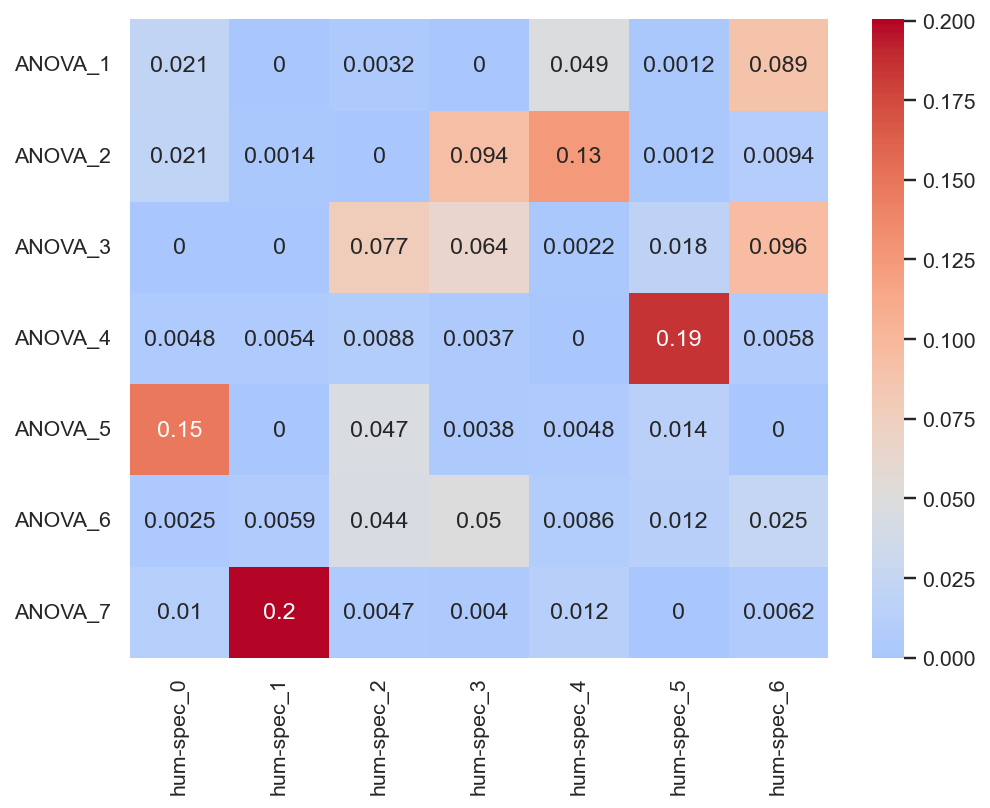

In [100]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('jaccard')
pairwise_jaccard = pd.DataFrame(1 - dist.pairwise(dummie_concat.T), columns=dummie_concat.columns, index=dummie_concat.columns)
pairwise_jaccard

plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pairwise_jaccard.loc[anova_dummies.columns, hs_dummies.columns], annot=True, cmap = 'coolwarm', center=0.05)
plt.grid(False)

In [142]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['HS cluster'] = labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['HS cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer       L1  L2  L3  L4  L5  L6  WM
HS cluster                            
0           47  31  34  39  40  36  28
1           31  28  28  28  29  26  39
2           46  32  48  37  32  43  33
3           48  45  40  47  49  54  40
4           24  31  45  35  40  36  50
5           26  39  46  42  36  41  60
6           56  36  40  55  40  52  33

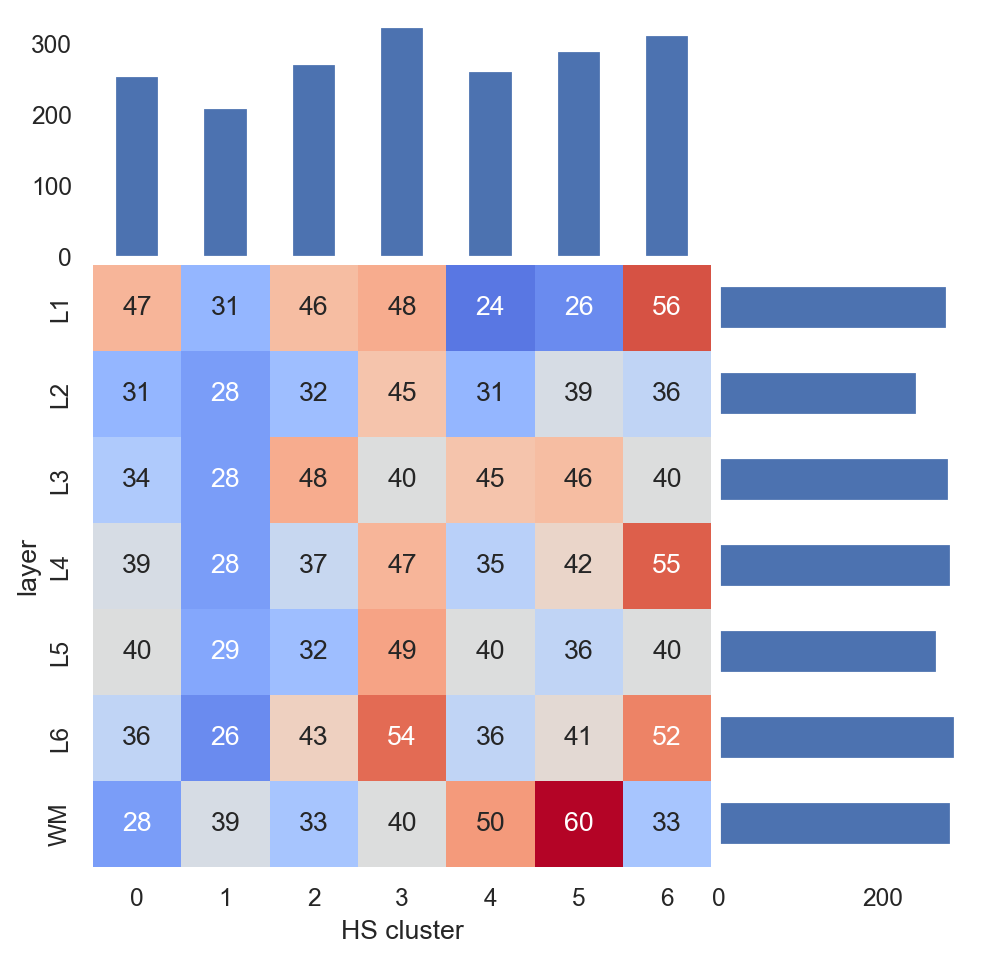

In [143]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

## Cluster intersection of ANOVA significant and human-specific (profiles) genes

D:\Projects\diploma\venv_stats2\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


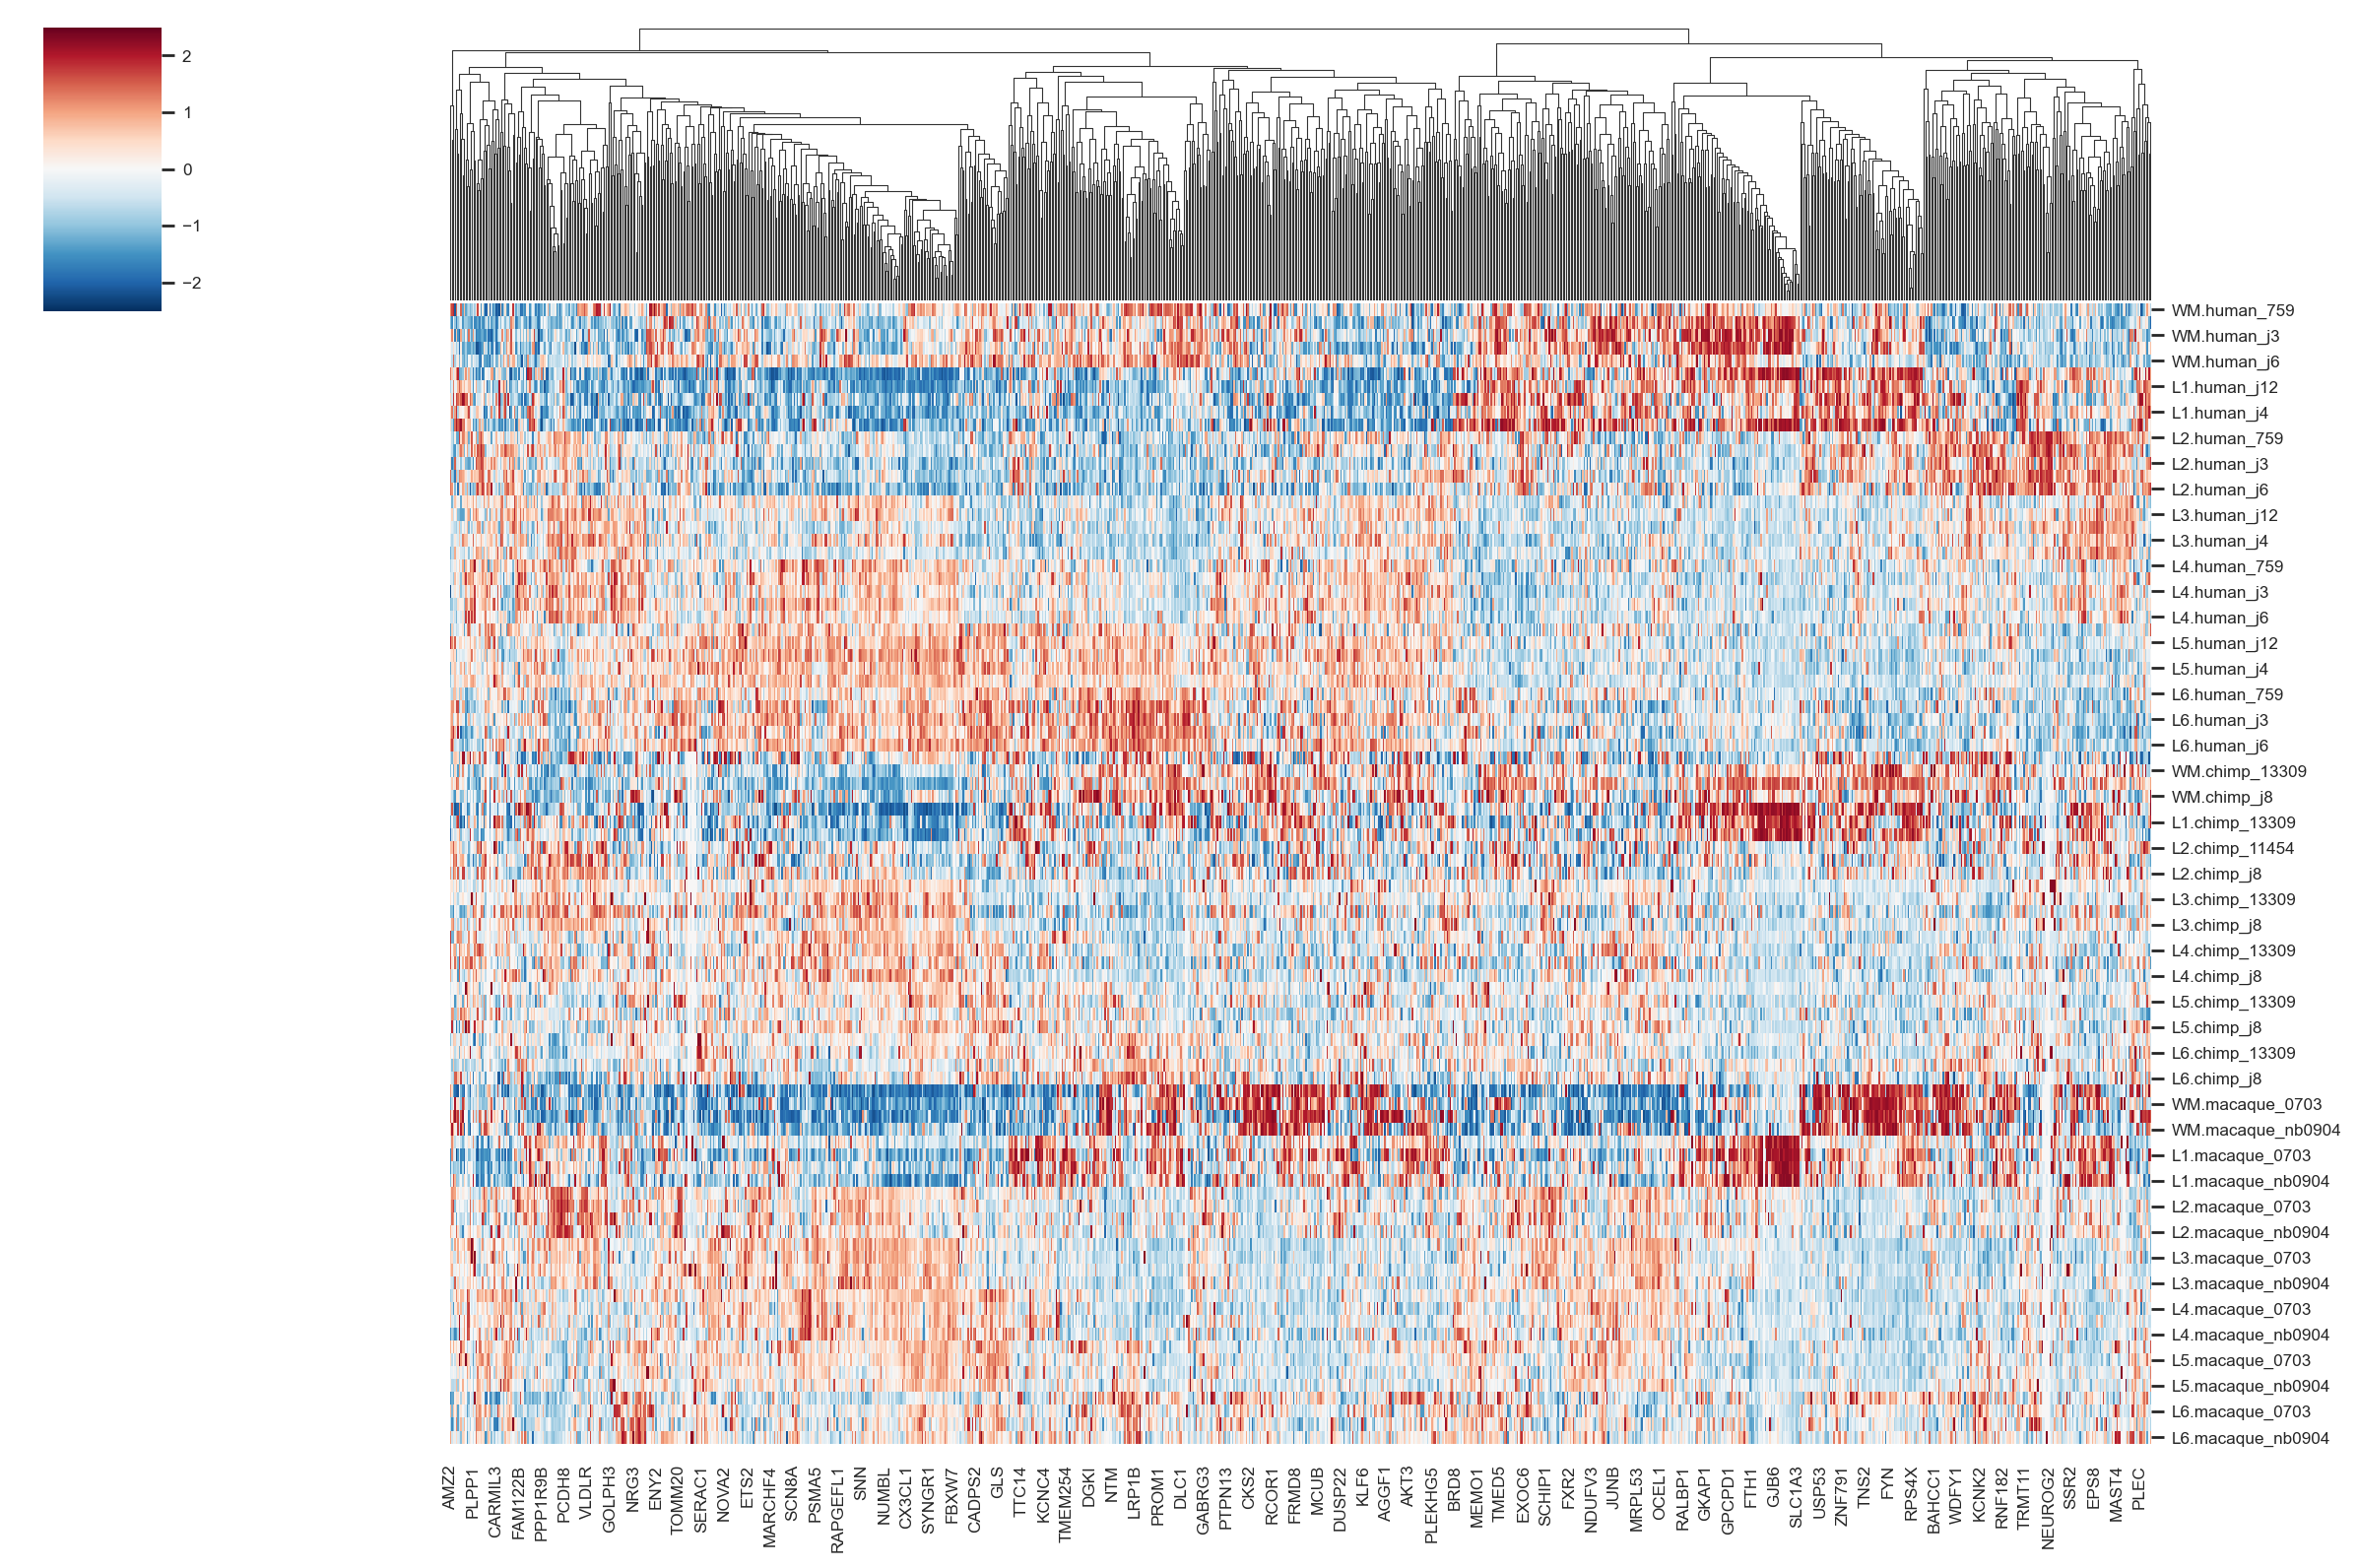

In [110]:
sns.set(font_scale=0.7)
sns.clustermap(df[anova_hs_inter], figsize=(15, 10), cmap="RdBu_r", center=0, vmax=2.5, vmin=-2.5, metric='cosine', annot_kws={"size": 2}, row_cluster=False)

In [151]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics.pairwise import pairwise_kernels
aff_matrix = pairwise_kernels(df[anova_hs_inter].T, metric='cosine') + 1
n_clusters = 7
clustering = SpectralClustering(n_clusters=n_clusters, gamma=1, affinity='precomputed', random_state=4)
clustering.fit(aff_matrix)

SpectralClustering(affinity='precomputed', gamma=1, n_clusters=7,
                   random_state=4)

In [152]:
labels = pd.Series(clustering.labels_, index=anova_hs_genes).sort_values()
order = labels.sort_values().index

In [149]:
labels.name = 'clusters'
labels.to_csv('results/hs_prof_anova.csv')

In [155]:
labels = pd.read_csv('results/hs_prof_anova.csv', index_col=0)['clusters']
labels

MICU3       0
TMEM121B    0
PITPNM3     0
CHPT1       0
KCNIP3      0
           ..
ZYX         6
KCND2       6
CAV2        6
TENT4A      6
ANKRD65     6
Name: clusters, Length: 1118, dtype: int64

<Axes: >

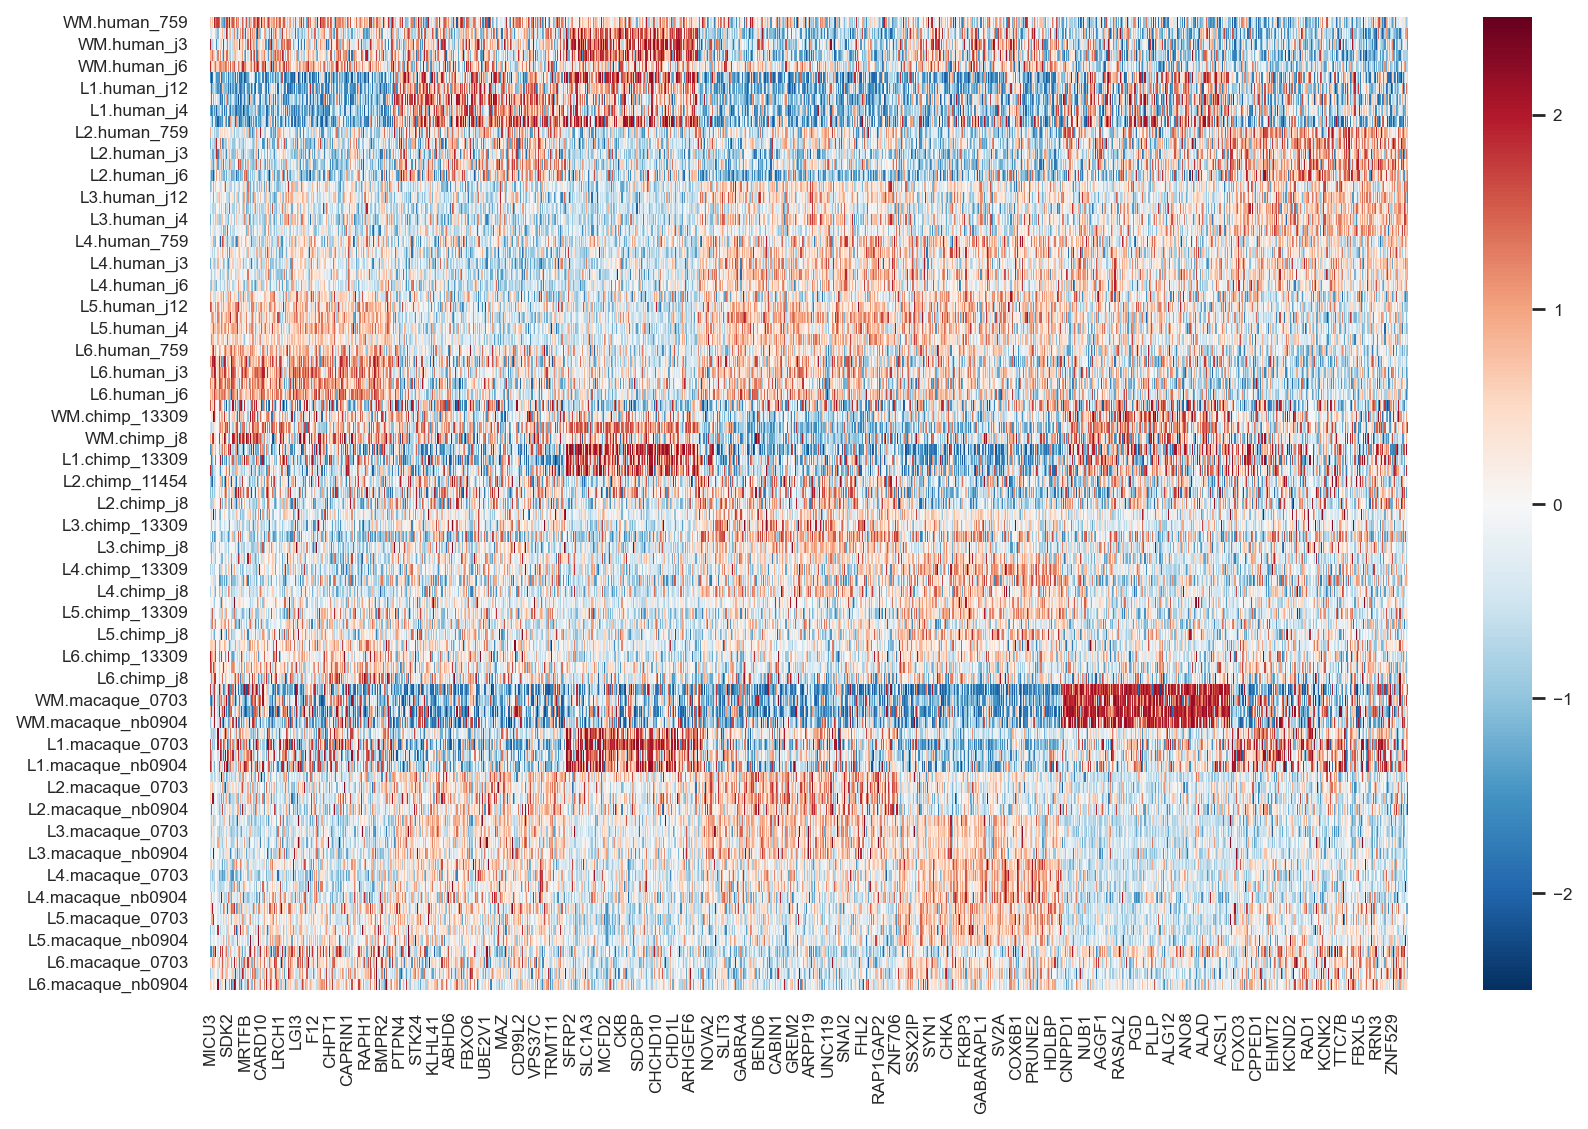

In [156]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.loc[sample_order['all'], order], ax=ax, cmap="RdBu_r", vmax=2.5, vmin=-2.5, center=0)
#plt.savefig(f'heatmaps/heatmap_spectr{n_clusters}_anova.png', bbox_inches='tight')

In [157]:
df_annotation = df[hs_genes].copy()
df_annotation['layer'] = adata_pb_norm.obs.layer
df_annotation['condition'] = adata_pb_norm.obs.condition

In [158]:
layer_mean = df_annotation.groupby(['condition', 'layer']).mean()
layer_mean.head()

HES4   B3GALT6    UBE2J2     PUSL1    MRPL20   ANKRD65  \
condition layer                                                               
chimp     L1     0.353655 -0.320918  0.371932 -0.338637  0.244849  0.000000   
          L2    -0.244119 -0.320918 -0.955585 -0.280824 -0.354620  0.000000   
          L3     0.045336  0.476792 -0.017932  0.155180 -0.285386 -0.111803   
          L4     0.121193 -0.020897  0.686458 -0.112241 -0.460649 -0.111803   
          L5     0.111245 -0.003522 -0.471423 -0.184447  0.101543 -0.111803   

                     NADK     GABRD    FAAP20    TPRG1L  ...      PCP4  \
condition layer                                          ...             
chimp     L1     1.106832 -0.499093 -0.718225 -0.863436  ... -0.821467   
          L2    -1.020345 -0.836275  0.965990 -0.486980  ... -1.161794   
          L3     0.254596  0.962491  0.051409  0.167389  ... -0.898746   
          L4    -0.128780  0.408388 -0.322941  0.939922  ...  0.751622   
          L5    -0.061237 -0.165721  0.422940  0.943084  ...  1.081032   

                    DSCAM   SLC37A1    NDUFV3     RRP1B      PDXK      PFKL  \
condition layer                                                               
chimp     L1    -1.434593 -0.346031 -0.401580  1.555814  0.366631  0.719720   
          L2    -0.392086  0.550133  0.416086  0.547475  0.063022  0.215785   
          L3    -0.741910  1.403646 -0.698233 -1.020194 -0.579462 -0.170436   
          L4    -0.069347 -0.204636 -0.449077 -0.959363 -0.337268 -0.167374   
          L5     0.657609 -0.043083  0.150024 -0.038893 -0.111654 -0.358772   

                  CFAP410   SLC19A1       LSS  
condition layer                                
chimp     L1     0.028516 -0.663443 -0.125988  
          L2     0.246156 -0.299084 -0.125988  
          L3     0.355550  0.232574  1.005520  
          L4     0.811889 -0.335082 -0.232370  
          L5    -0.130464 -0.449456 -0.232370  

[5 rows x 2949 columns]

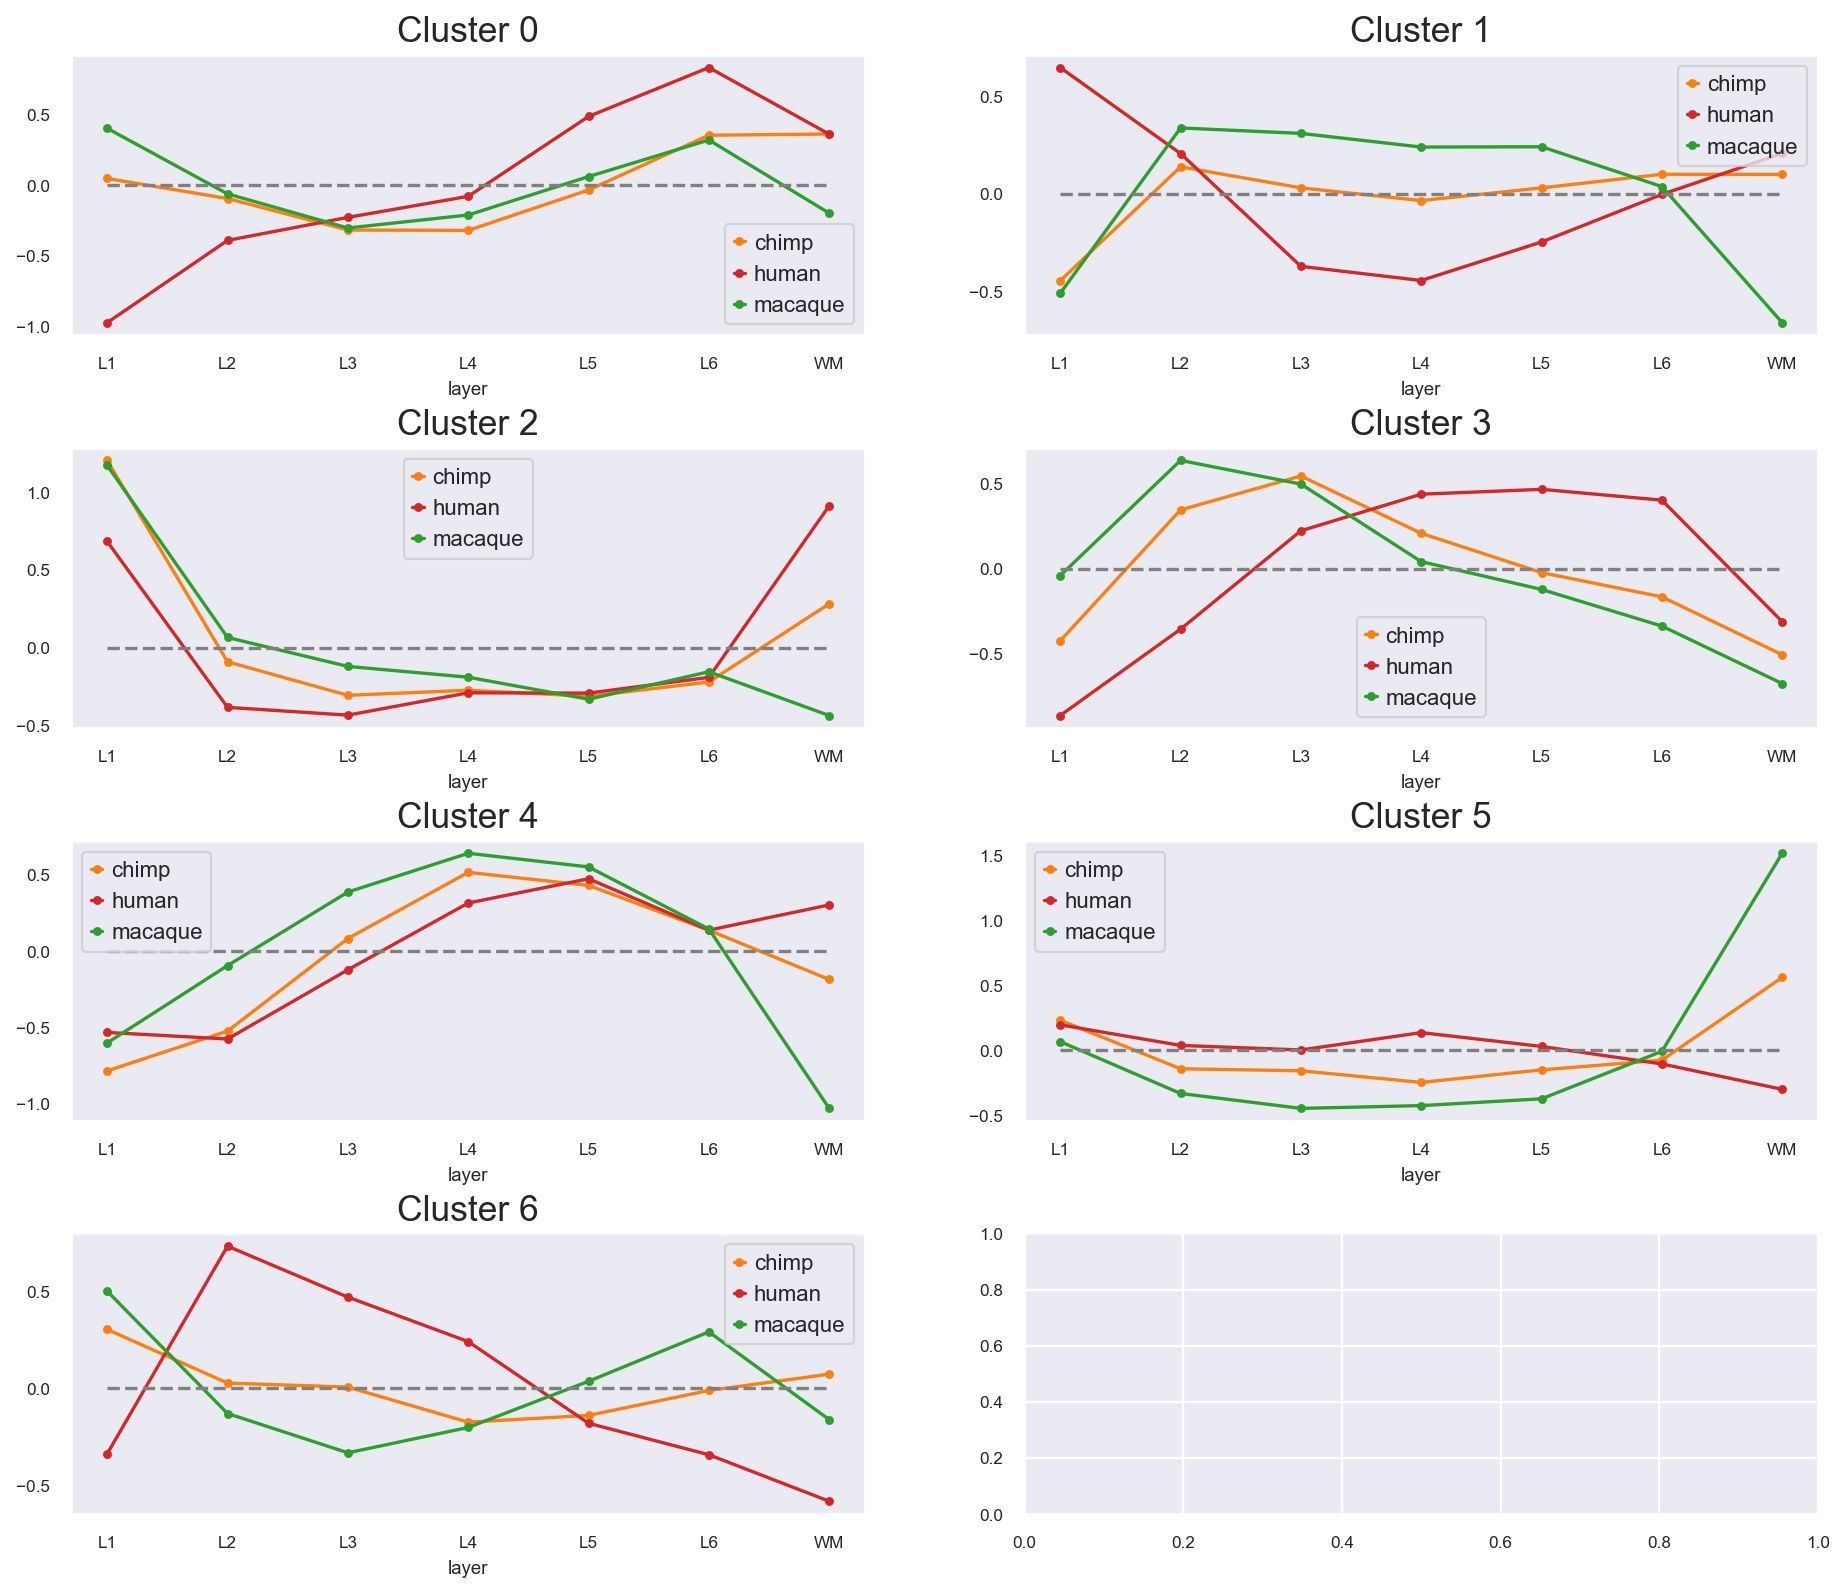

In [159]:
fig, axes = plt.subplots((n_clusters + 1) // 2, 2,  figsize=(14, 3.5 * n_clusters // 2), gridspec_kw={'hspace': 0.4})
sns.set(font_scale=1)
for label, ax in zip(labels.unique(), axes.flatten()):
    genes = labels[labels == label].index.tolist()

    (
        layer_mean[genes]
        .mean(axis=1)
        .reorder_levels(['layer', 'condition'])
        .unstack().loc[layers]
        .plot
        .line(color={'human': 'tab:red', 'chimp': 'tab:orange', 'macaque': 'tab:green'}, ax=ax, marker='.')
    )
    ax.legend(fontsize=10)
    ax.set_title(f'Cluster {label}', fontsize=16)
    ax.grid(False)
    ax.hlines(0, xmin=0, xmax=6, colors='gray', linestyles='dashed')
#plt.savefig(f'hs_clusters.png', bbox_inches='tight')

In [160]:
table_to_pivot = pd.concat([labels_anova.loc[anova_hs_genes], labels.loc[anova_hs_genes]], axis=1)
table_to_pivot.columns = ['ANOVA_labels', 'hs_labels']
pivot_labels_inter = table_to_pivot.groupby('ANOVA_labels').value_counts().unstack().fillna(0)
pivot_labels_inter

hs_labels        0     1      2     3     4      5     6
ANOVA_labels                                            
1             47.0  28.0    0.0   7.0  55.0    0.0   0.0
2              0.0  23.0    3.0  88.0  75.0    1.0   3.0
3             88.0   1.0    1.0  56.0   2.0   15.0  53.0
4              6.0   3.0    5.0   3.0   2.0  128.0   6.0
5              0.0  86.0    1.0   2.0   6.0    8.0  58.0
6             22.0   2.0    3.0  29.0  10.0    6.0  43.0
7              9.0  17.0  110.0   2.0   2.0    0.0   3.0

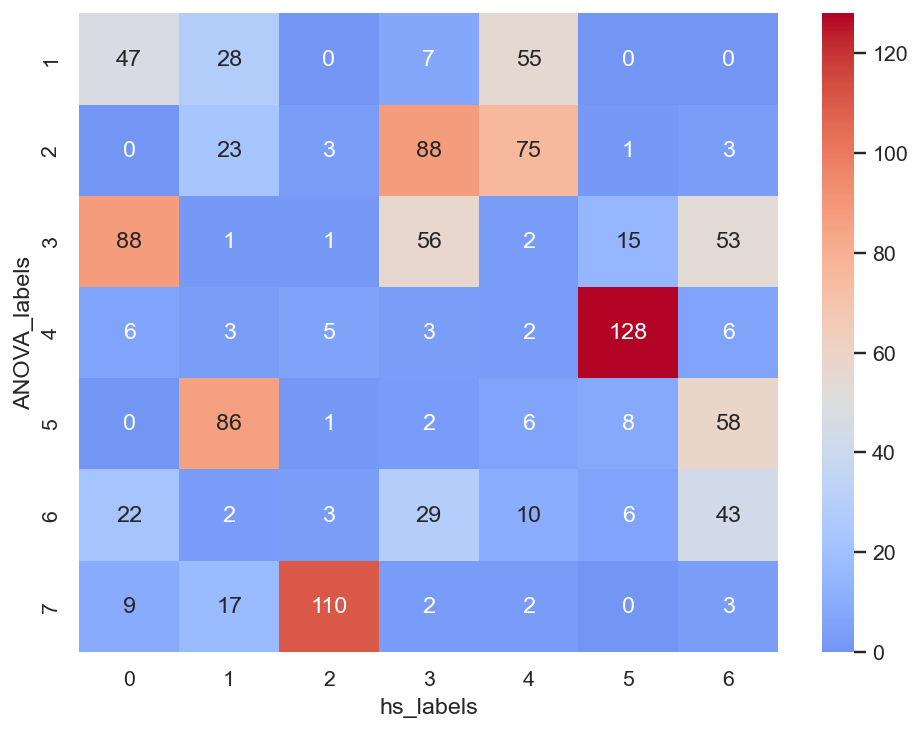

In [161]:
plt.figure(figsize=(8, 6), dpi=70)
sns.set(font_scale=1)
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f")
plt.grid(False)

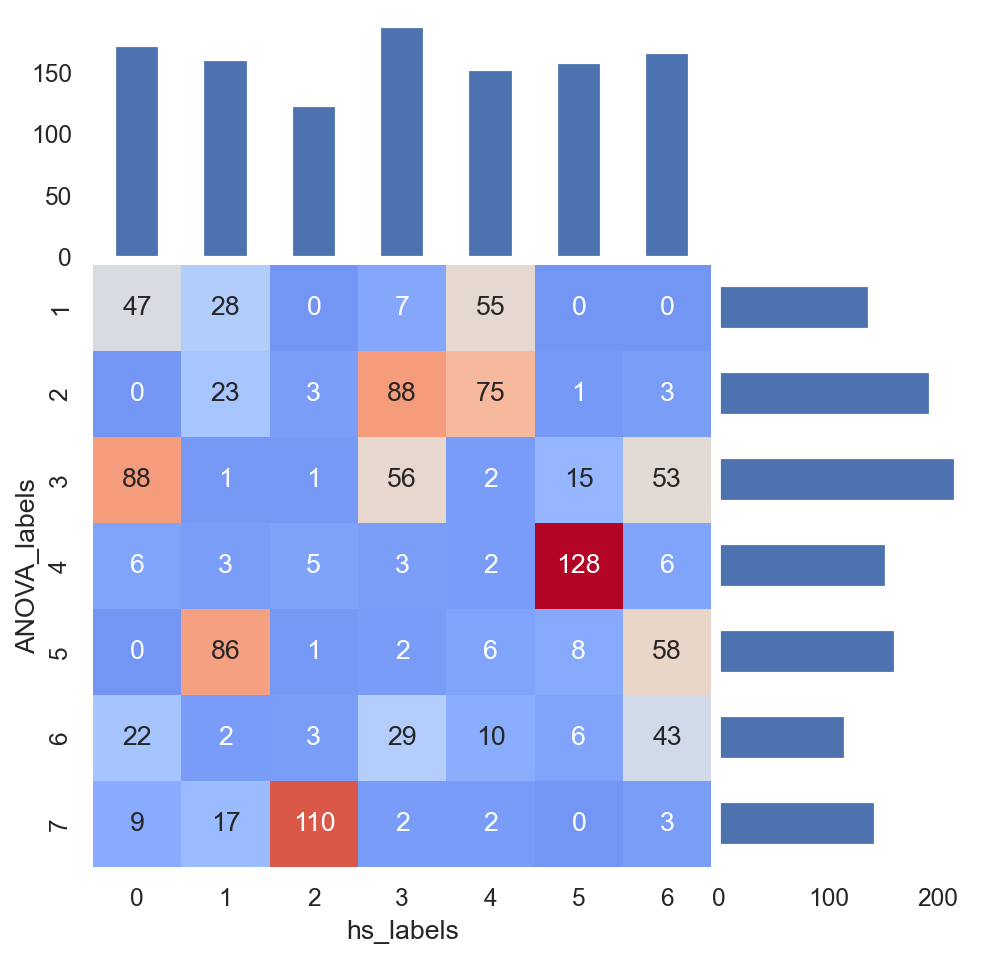

In [162]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(pivot_labels_inter, annot=True, cmap = 'coolwarm', center=50, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
pivot_labels_inter.sum(axis=0).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = pivot_labels_inter.index[::-1]
pivot_labels_inter.sum(axis=1).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)

In [163]:
onehot_unstack = hum_spec_anova_onehot.unstack()
onehot_unstack.name = 'hum-spec & ANOVA'
onehot_unstack = onehot_unstack.to_frame()
onehot_unstack.index.names = ['gene', 'layer']
onehot_unstack.index.get_level_values('gene')
onehot_unstack.reset_index(level=1, inplace=True)
onehot_unstack['HS cluster'] = labels.loc[onehot_unstack.index]
layer_count = onehot_unstack[onehot_unstack['hum-spec & ANOVA'] == 1].groupby(['HS cluster', 'layer']).count().unstack()
layer_count = layer_count['hum-spec & ANOVA']
layer_count

layer       L1  L2  L3  L4  L5  L6  WM
HS cluster                            
0           63  32  35  46  49  48  30
1           50  30  37  46  34  32  33
2           30  27  30  30  30  24  43
3           48  49  49  37  57  67  43
4           19  28  41  41  35  36  42
5           24  37  42  43  34  36  57
6           44  39  47  40  27  45  35

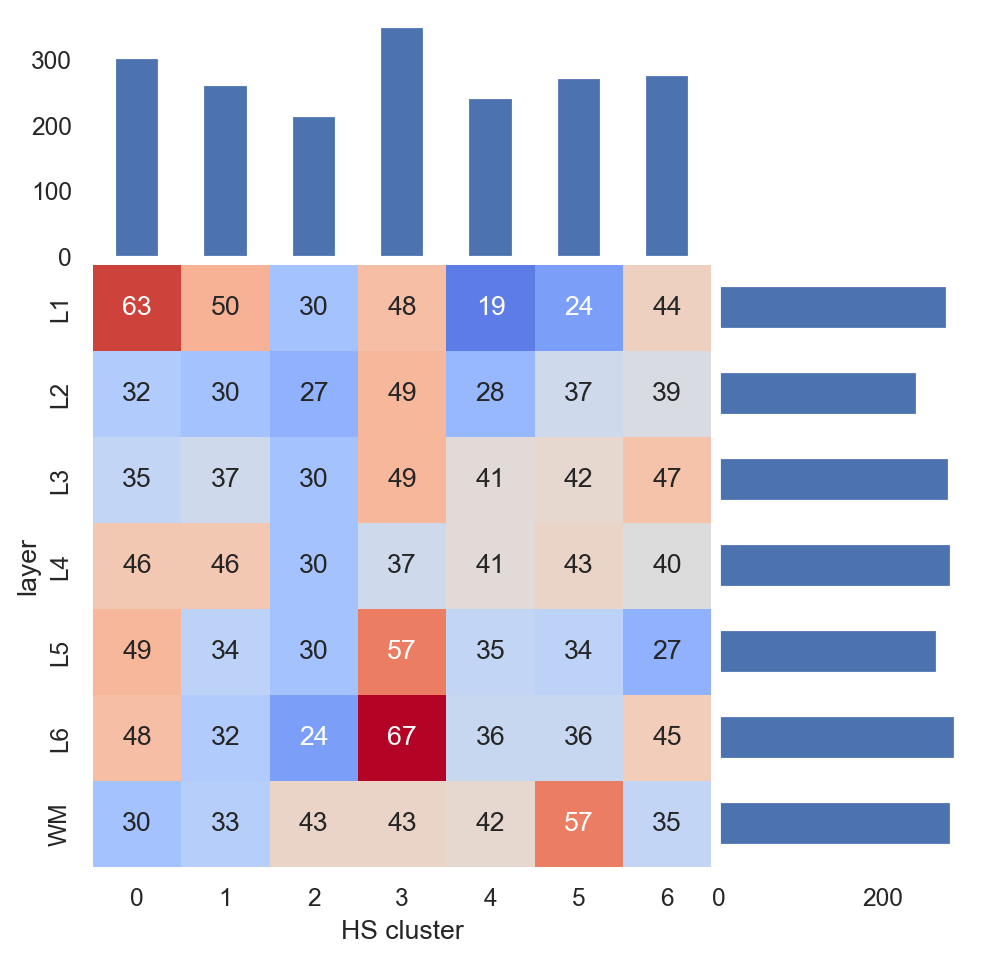

In [164]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(layer_count.T, annot=True, cmap = 'coolwarm', center=40, fmt=".0f", ax=ax, cbar=False)


divider = make_axes_locatable(ax)
cax = divider.append_axes('top', size='40%', pad=0.05)
layer_count.sum(axis=1).plot.bar(ax=cax)
cax.set_facecolor(color='white')
cax.get_xaxis().set_visible(False)

cax = divider.append_axes('right', size='40%', pad=0.05)
index_order = layer_count.columns[::-1]
layer_count.sum(axis=0).loc[index_order].plot.barh(ax=cax)
cax.set_facecolor(color='white')
cax.get_yaxis().set_visible(False)